<a href="https://colab.research.google.com/github/vinaykumar007/MINI-PROJECTS/blob/main/Ameo_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
import joblib

**Data inspection**

In [ ]:
df = pd.read_csv("ameo_data.csv")
df.head()

Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [ ]:
print(df.shape)

(3998, 39)


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [ ]:
df

Unnamed: 0      ID     Salary           DOJ           DOL  \
0         train  203097   420000.0   6/1/12 0:00       present   
1         train  579905   500000.0   9/1/13 0:00       present   
2         train  810601   325000.0   6/1/14 0:00       present   
3         train  267447  1100000.0   7/1/11 0:00       present   
4         train  343523   200000.0   3/1/14 0:00   3/1/15 0:00   
...         ...     ...        ...           ...           ...   
3993      train   47916   280000.0  10/1/11 0:00  10/1/12 0:00   
3994      train  752781   100000.0   7/1/13 0:00   7/1/13 0:00   
3995      train  355888   320000.0   7/1/13 0:00       present   
3996      train  947111   200000.0   7/1/14 0:00   1/1/15 0:00   
3997      train  324966   400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
0         senior quality engineer         Bangalore      f  2/19/90 0:00   
1               assistant manager            Indore      m  10/4/89 0:00   
2                systems engineer           Chennai      f   8/3/92 0:00   
3        senior software engineer           Gurgaon      m  12/5/89 0:00   
4                             get           Manesar      m  2/27/91 0:00   
...                           ...               ...    ...           ...   
3993            software engineer        New Delhi       m  4/15/87 0:00   
3994             technical writer         Hyderabad      f  8/27/92 0:00   
3995  associate software engineer         Bangalore      m   7/3/91 0:00   
3996           software developer  Asifabadbanglore      f  3/20/92 0:00   
3997      senior systems engineer           Chennai      f  2/26/91 0:00   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
0            84.30  ...              -1              -1              -1   
1            85.40  ...              -1              -1              -1   
2            85.00  ...              -1              -1              -1   
3            85.60  ...              -1              -1              -1   
4            78.00  ...              -1              -1              -1   
...            ...  ...             ...             ...             ...   
3993         52.09  ...              -1              -1              -1   
3994         90.00  ...              -1              -1              -1   
3995         81.86  ...              -1              -1              -1   
3996         78.72  ...             438              -1              -1   
3997         70.60  ...              -1              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
0             -1         -1             0.9737        0.8128       0.5269   
1             -1         -1            -0.7335        0.3789       1.2396   
2             -1         -1             0.2718        1.7109       0.1637   
3             -1         -1             0.0464        0.3448      -0.3440   
4             -1         -1            -0.8810       -0.2793      -1.0697   
...          ...        ...                ...           ...          ...   
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3996          -1         -1            -0.1590        0.0459      -0.4511   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  
0         1.35490                -0.4455  
1        -0.10760                 0.8637  
2        -0.86820                 0.6721  
3        -0.40780                -0.9194  
4         0.09163                -0.1295  
...           ...                    ...  
3993      0.64980                -0.9194  
3994      0.77980                -0.0943  
3995     -1.31840                -0.7615  
3996     -0.36120                -0.0943  


In [ ]:
# drop unimportant columns
df.drop(df.iloc[:, 0:2], axis=1, inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   float64
 1   DOJ                    3998 non-null   object 
 2   DOL                    3998 non-null   object 
 3   Designation            3998 non-null   object 
 4   JobCity                3998 non-null   object 
 5   Gender                 3998 non-null   object 
 6   DOB                    3998 non-null   object 
 7   10percentage           3998 non-null   float64
 8   10board                3998 non-null   object 
 9   12graduation           3998 non-null   int64  
 10  12percentage           3998 non-null   float64
 11  12board                3998 non-null   object 
 12  CollegeID              3998 non-null   int64  
 13  CollegeTier            3998 non-null   int64  
 14  Degree                 3998 non-null   object 
 15  Spec

In [ ]:
# Convert CollegeTier to categorical
df['CollegeTier'] = df['CollegeTier'].astype('category')
# Convert CollegeCityID to categorical
df['CollegeCityID'] = df['CollegeCityID'].astype('category')
# Convert CollegeCityTier to categorical
df['CollegeCityTier'] = df['CollegeCityTier'].astype('category')
df['CollegeID']=df['CollegeID'].astype('category')
# Convert JobCity to categorical
df['JobCity '] = df['JobCity'].astype('category')
# Convert GraduationYear to categorical
df['GraduationYear'] = df['GraduationYear'].astype('category')
df['12graduation'] = df['12graduation'].astype('category')

In [ ]:
print(df.dtypes)

Salary                    float64
DOJ                        object
DOL                        object
Designation                object
JobCity                    object
Gender                     object
DOB                        object
10percentage              float64
10board                    object
12graduation             category
12percentage              float64
12board                    object
CollegeID                category
CollegeTier              category
Degree                     object
Specialization             object
collegeGPA                float64
CollegeCityID            category
CollegeCityTier          category
CollegeState               object
GraduationYear           category
English                     int64
Logical                     int64
Quant                       int64
Domain                    float64
ComputerProgramming         int64
ElectronicsAndSemicon       int64
ComputerScience             int64
MechanicalEngg              int64
ElectricalEngg

In [ ]:
print(df["CollegeID"].nunique())
print(df["CollegeCityID"].nunique())
print(df["CollegeTier"].nunique())
print(df["JobCity"].nunique())
print(df["CollegeCityTier"].nunique())

1350
1350
2
339
2


In [ ]:
# Drop redundant columns
df = df.drop(['CollegeCityID','CollegeCityTier'], axis=1)

In [ ]:
from datetime import datetime

In [ ]:


# Convert DOJ and DOB to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'], format='%m/%d/%y %H:%M')
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y %H:%M')

# Handle DOL (where 'present' needs to be replaced with the current date)
# Use %Y for year in strftime when replacing 'present' for consistency with DOL format.
df['DOL'] = df['DOL'].replace('present', datetime.now().strftime('%m/%d/%y %H:%M'))
df['DOL'] = pd.to_datetime(df['DOL'], format='%m/%d/%y %H:%M')
df

Salary        DOJ                 DOL                  Designation  \
0      420000.0 2012-06-01 2024-10-02 14:31:00      senior quality engineer   
1      500000.0 2013-09-01 2024-10-02 14:31:00            assistant manager   
2      325000.0 2014-06-01 2024-10-02 14:31:00             systems engineer   
3     1100000.0 2011-07-01 2024-10-02 14:31:00     senior software engineer   
4      200000.0 2014-03-01 2015-03-01 00:00:00                          get   
...         ...        ...                 ...                          ...   
3993   280000.0 2011-10-01 2012-10-01 00:00:00            software engineer   
3994   100000.0 2013-07-01 2013-07-01 00:00:00             technical writer   
3995   320000.0 2013-07-01 2024-10-02 14:31:00  associate software engineer   
3996   200000.0 2014-07-01 2015-01-01 00:00:00           software developer   
3997   400000.0 2013-02-01 2024-10-02 14:31:00      senior systems engineer   

               JobCity Gender        DOB  10percentage  \
0            Bangalore      f 1990-02-19         84.30   
1               Indore      m 1989-10-04         85.40   
2              Chennai      f 1992-08-03         85.00   
3              Gurgaon      m 1989-12-05         85.60   
4              Manesar      m 1991-02-27         78.00   
...                ...    ...        ...           ...   
3993        New Delhi       m 1987-04-15         52.09   
3994         Hyderabad      f 1992-08-27         90.00   
3995         Bangalore      m 1991-07-03         81.86   
3996  Asifabadbanglore      f 1992-03-20         78.72   
3997           Chennai      f 1991-02-26         70.60   

                             10board 12graduation  ...  MechanicalEngg  \
0     board ofsecondary education,ap         2007  ...              -1   
1                               cbse         2007  ...              -1   
2                               cbse         2010  ...              -1   
3                               cbse         2007  ...              -1   
4                               cbse         2008  ...              -1   
...                              ...          ...  ...             ...   
3993                            cbse         2006  ...              -1   
3994                     state board         2009  ...              -1   
3995                      bse,odisha         2008  ...              -1   
3996                     state board         2010  ...              -1   
3997                            cbse         2008  ...              -1   

     ElectricalEngg TelecomEngg CivilEngg conscientiousness agreeableness  \
0                -1          -1        -1            0.9737        0.8128   
1                -1          -1        -1           -0.7335        0.3789   
2                -1          -1        -1            0.2718        1.7109   
3                -1          -1        -1            0.0464        0.3448   
4                -1          -1        -1           -0.8810       -0.2793   
...             ...         ...       ...               ...           ...   
3993             -1          -1        -1           -0.1082        0.3448   
3994             -1          -1        -1           -0.3027        0.8784   
3995             -1          -1        -1           -1.5765       -1.5273   
3996             -1          -1        -1           -0.1590        0.0459   
3997             -1          -1        -1           -1.1128       -0.2793   

      extraversion nueroticism openess_to_experience          JobCity   
0           0.5269     1.35490               -0.4455         Bangalore  
1           1.2396    -0.10760                0.8637            Indore  
2           0.1637    -0.86820                0.6721           Chennai  
3          -0.3440    -0.40780               -0.9194           Gurgaon  
4          -1.0697     0.09163               -0.1295           Manesar  
...            ...         ...                   ...               ...  
3993        0.2366     0.64980        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   float64       
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   datetime64[ns]
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   category      
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeID              3998 non-null   category      
 13  Col

**Plotting Frequency Plots for Categorical Variables**

In [ ]:
df['Tenure']=(df['DOL']-df['DOJ']).dt.days/365.25
df['Age_yrs']=(datetime.now()-df['DOB']).dt.days/365.25
df['Age_yrs']=df['Age_yrs'].astype('int')

In [ ]:
#drop DOL,DOB,DOJ
df=df.drop(['DOL','DOB','DOJ'],axis=1)

In [ ]:
df['Tenure']=df['Tenure'].astype('int')
df

Salary                  Designation           JobCity Gender  \
0      420000.0      senior quality engineer         Bangalore      f   
1      500000.0            assistant manager            Indore      m   
2      325000.0             systems engineer           Chennai      f   
3     1100000.0     senior software engineer           Gurgaon      m   
4      200000.0                          get           Manesar      m   
...         ...                          ...               ...    ...   
3993   280000.0            software engineer        New Delhi       m   
3994   100000.0             technical writer         Hyderabad      f   
3995   320000.0  associate software engineer         Bangalore      m   
3996   200000.0           software developer  Asifabadbanglore      f   
3997   400000.0      senior systems engineer           Chennai      f   

      10percentage                         10board 12graduation  12percentage  \
0            84.30  board ofsecondary education,ap         2007         95.80   
1            85.40                            cbse         2007         85.00   
2            85.00                            cbse         2010         68.20   
3            85.60                            cbse         2007         83.60   
4            78.00                            cbse         2008         76.80   
...            ...                             ...          ...           ...   
3993         52.09                            cbse         2006         55.50   
3994         90.00                     state board         2009         93.00   
3995         81.86                      bse,odisha         2008         65.50   
3996         78.72                     state board         2010         69.88   
3997         70.60                            cbse         2008         68.00   

                                 12board CollegeID  ... TelecomEngg CivilEngg  \
0     board of intermediate education,ap      1141  ...          -1        -1   
1                                   cbse      5807  ...          -1        -1   
2                                   cbse        64  ...          -1        -1   
3                                   cbse      6920  ...          -1        -1   
4                                   cbse     11368  ...          -1        -1   
...                                  ...       ...  ...         ...       ...   
3993                                cbse      6268  ...          -1        -1   
3994                         state board      4883  ...          -1        -1   
3995                         chse,odisha      9786  ...          -1        -1   
3996                         state board       979  ...          -1        -1   
3997                                cbse      6609  ...          -1        -1   

     conscientiousness  agreeableness extraversion nueroticism  \
0               0.9737         0.8128       0.5269     1.35490   
1              -0.7335         0.3789       1.2396    -0.10760   
2               0.2718         1.7109       0.1637    -0.86820   
3               0.0464         0.3448      -0.3440    -0.40780   
4              -0.8810        -0.2793      -1.0697     0.09163   
...                ...            ...          ...         ...   
3993           -0.1082         0.3448       0.2366     0.64980   
3994           -0.3027         0.8784       0.9322     0.77980   
3995           -1.5765        -1.5273      -1.5051    -1.31840   
3996           -0.1590         0.0459      -0.4511    -0.36120   
3997           -1.1128        -0.2793      -0.6343     1.32553   

      openess_to_experience          JobCity   Tenure  Age_yrs  
0                   -0.4455         Bangalore      12       34  
1                    0.8637            Indore      11       34  
2                    0.6721           Chennai      10       32  
3                   -0.9194           Gurgaon      13       34  
4                   -0.1295           Manesar       0       33  
...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Salary                 3998 non-null   float64 
 1   Designation            3998 non-null   object  
 2   JobCity                3998 non-null   object  
 3   Gender                 3998 non-null   object  
 4   10percentage           3998 non-null   float64 
 5   10board                3998 non-null   object  
 6   12graduation           3998 non-null   category
 7   12percentage           3998 non-null   float64 
 8   12board                3998 non-null   object  
 9   CollegeID              3998 non-null   category
 10  CollegeTier            3998 non-null   category
 11  Degree                 3998 non-null   object  
 12  Specialization         3998 non-null   object  
 13  collegeGPA             3998 non-null   float64 
 14  CollegeState           3998 non-null   o

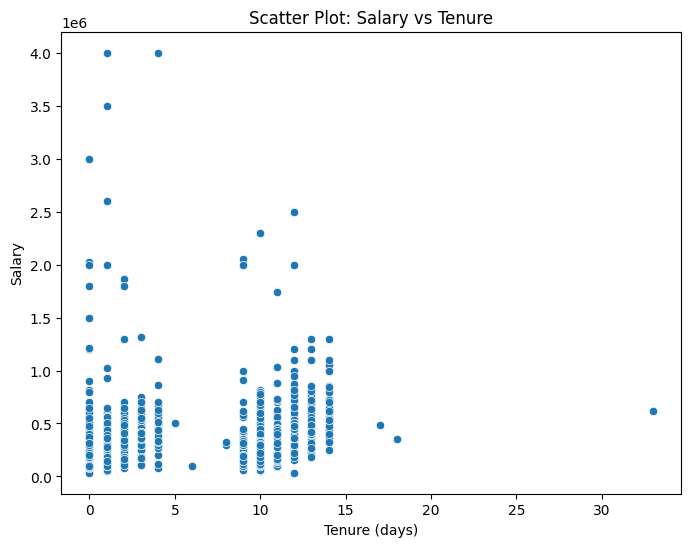

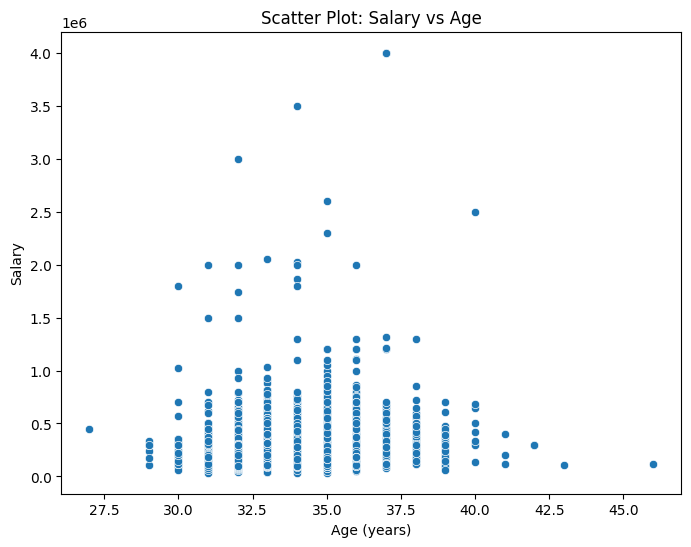

In [ ]:

# Scatter plot of Salary vs Tenure
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tenure', y='Salary', data=df)
plt.title('Scatter Plot: Salary vs Tenure')
plt.xlabel('Tenure (yrs)')
plt.ylabel('Salary')
plt.show()

# Scatter plot of Salary vs Age_yrs
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age_yrs', y='Salary', data=df)
plt.title('Scatter Plot: Salary vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Salary')
plt.show()


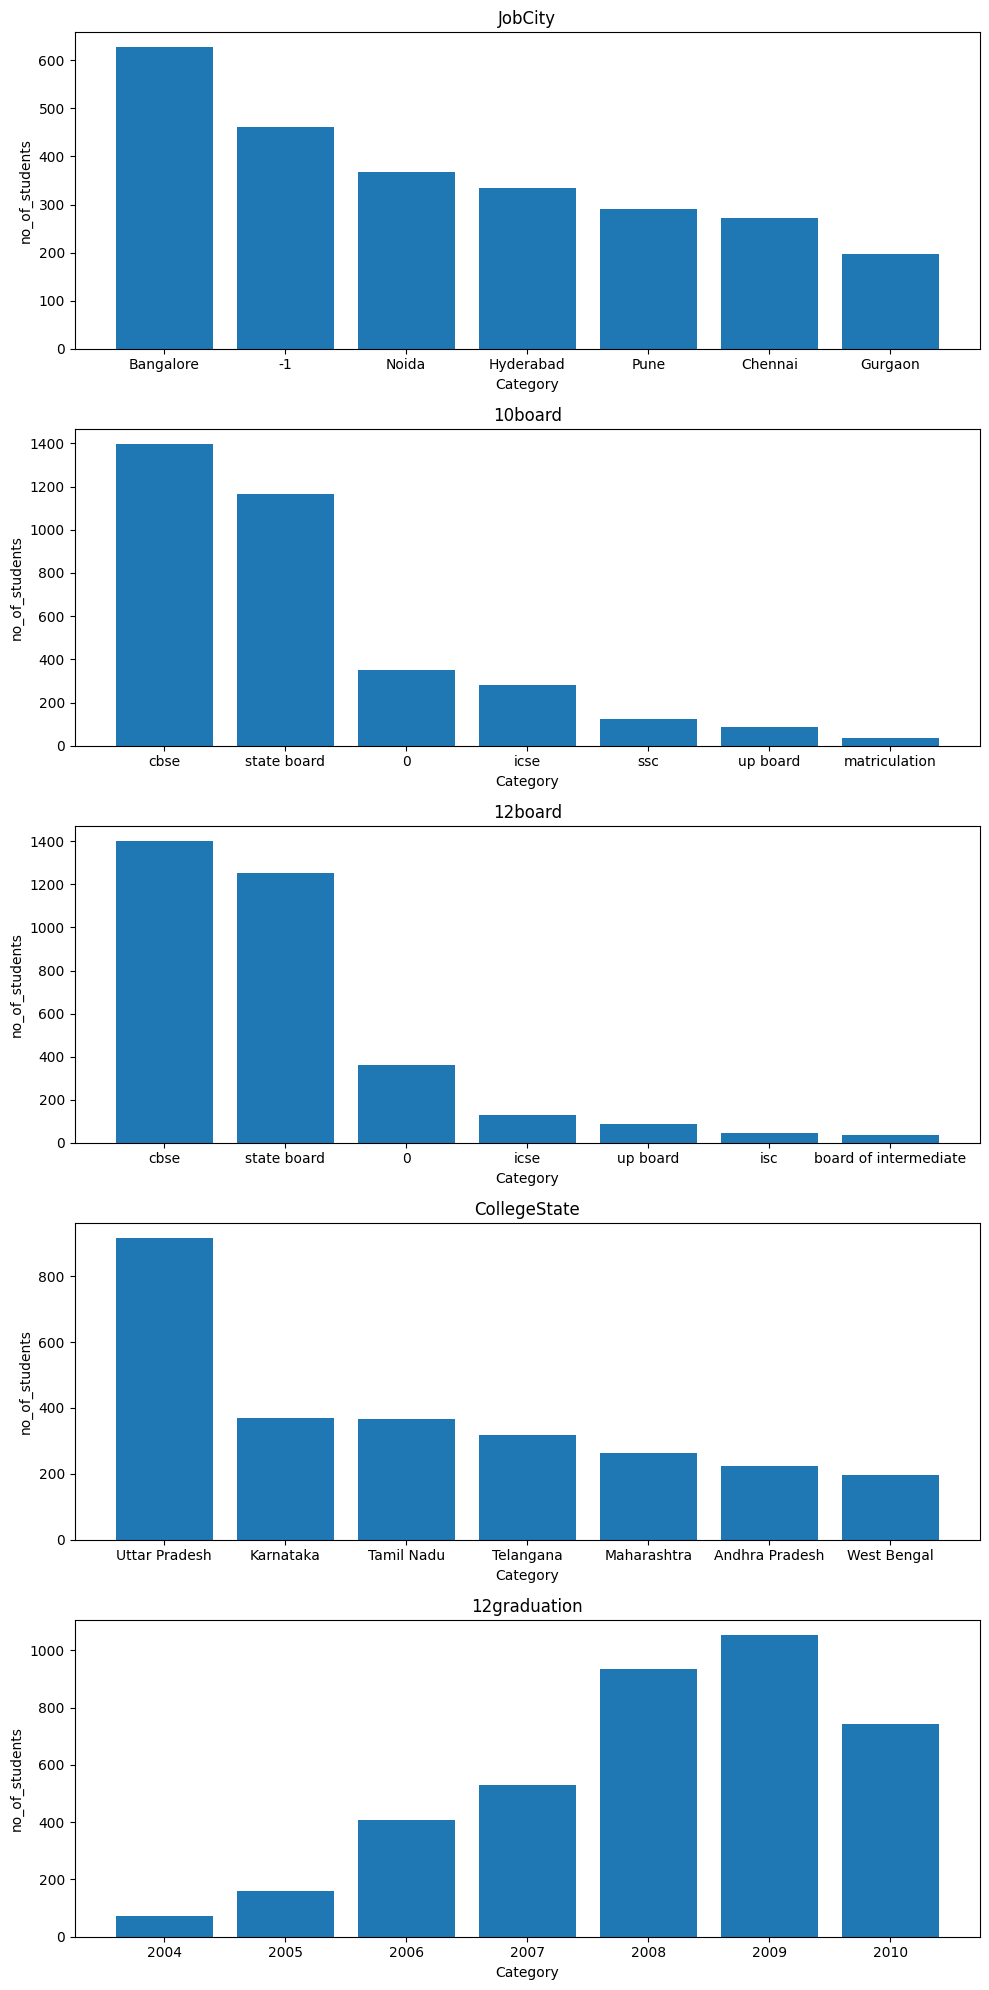

In [ ]:
import matplotlib.pyplot as plt

# Get the categorical variables
categorical_cols = ['JobCity', '10board', '12board', 'CollegeState', '12graduation']

# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=len(categorical_cols), figsize=(10, 20))

# Loop through each categorical variable and plot its frequency
for i, col in enumerate(categorical_cols):
    freq = df[col].value_counts().nlargest(7)
    axs[i].bar(freq.index, freq.values)
    axs[i].set_title(col)
    axs[i].set_xlabel('Category')
    axs[i].set_ylabel('no_of_students')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()


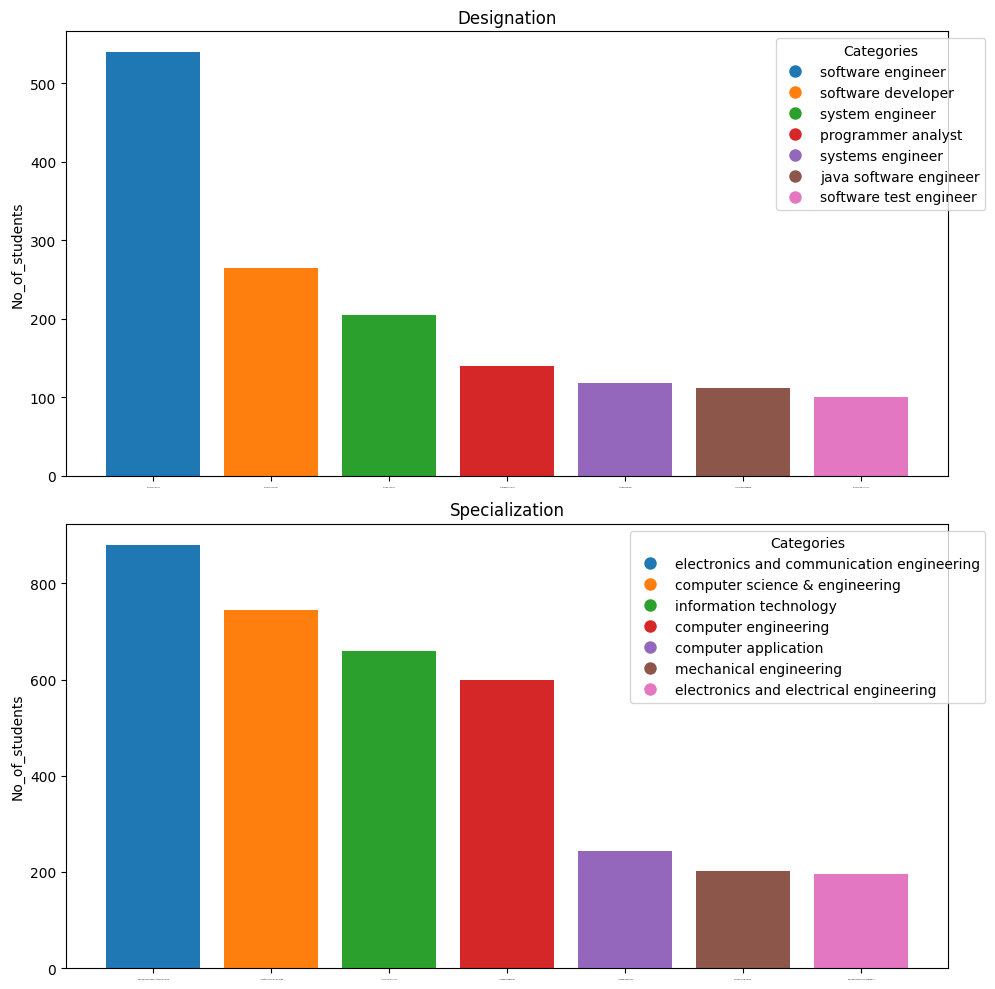

In [ ]:
categorical_cols_1=['Designation','Specialization']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=len(categorical_cols_1), figsize=(10, 10))
# Loop through each categorical variable and plot its frequency
for i, col in enumerate(categorical_cols_1):
    freq = df[col].value_counts().nlargest(7)
    axs[i].bar(freq.index, freq.values, color=[colors[j] for j in range(len(freq))])
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', labelrotation=0, labelsize=0)
    axs[i].set_ylabel('No_of_students')
    patches = [plt.Line2D([0], [0], marker='o', color='w', label=cat, markerfacecolor=colors[j], markersize=10) for j, cat in enumerate(freq.index)]
    axs[i].legend(handles=patches, loc='upper right', bbox_to_anchor=(1.05, 1), title='Categories')
# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()


*   missing or undefined data found in jobcity , 10 board , 12 board colums

In [ ]:
# using mode to correct missing data


# Get the mode of the JobCity,'10board', '12board' columns
mode_jobcity = df['JobCity'].mode().iloc[0]
mode_10board = df['10board'].mode().iloc[0]
mode_12board = df['12board'].mode().iloc[0]
# Replace the missing values with the mode
df['JobCity'] = df['JobCity'].replace('-1', mode_jobcity)
df['10board'] = df['10board'].replace('0', mode_10board)
df['12board'] = df['12board'].replace('0', mode_12board)


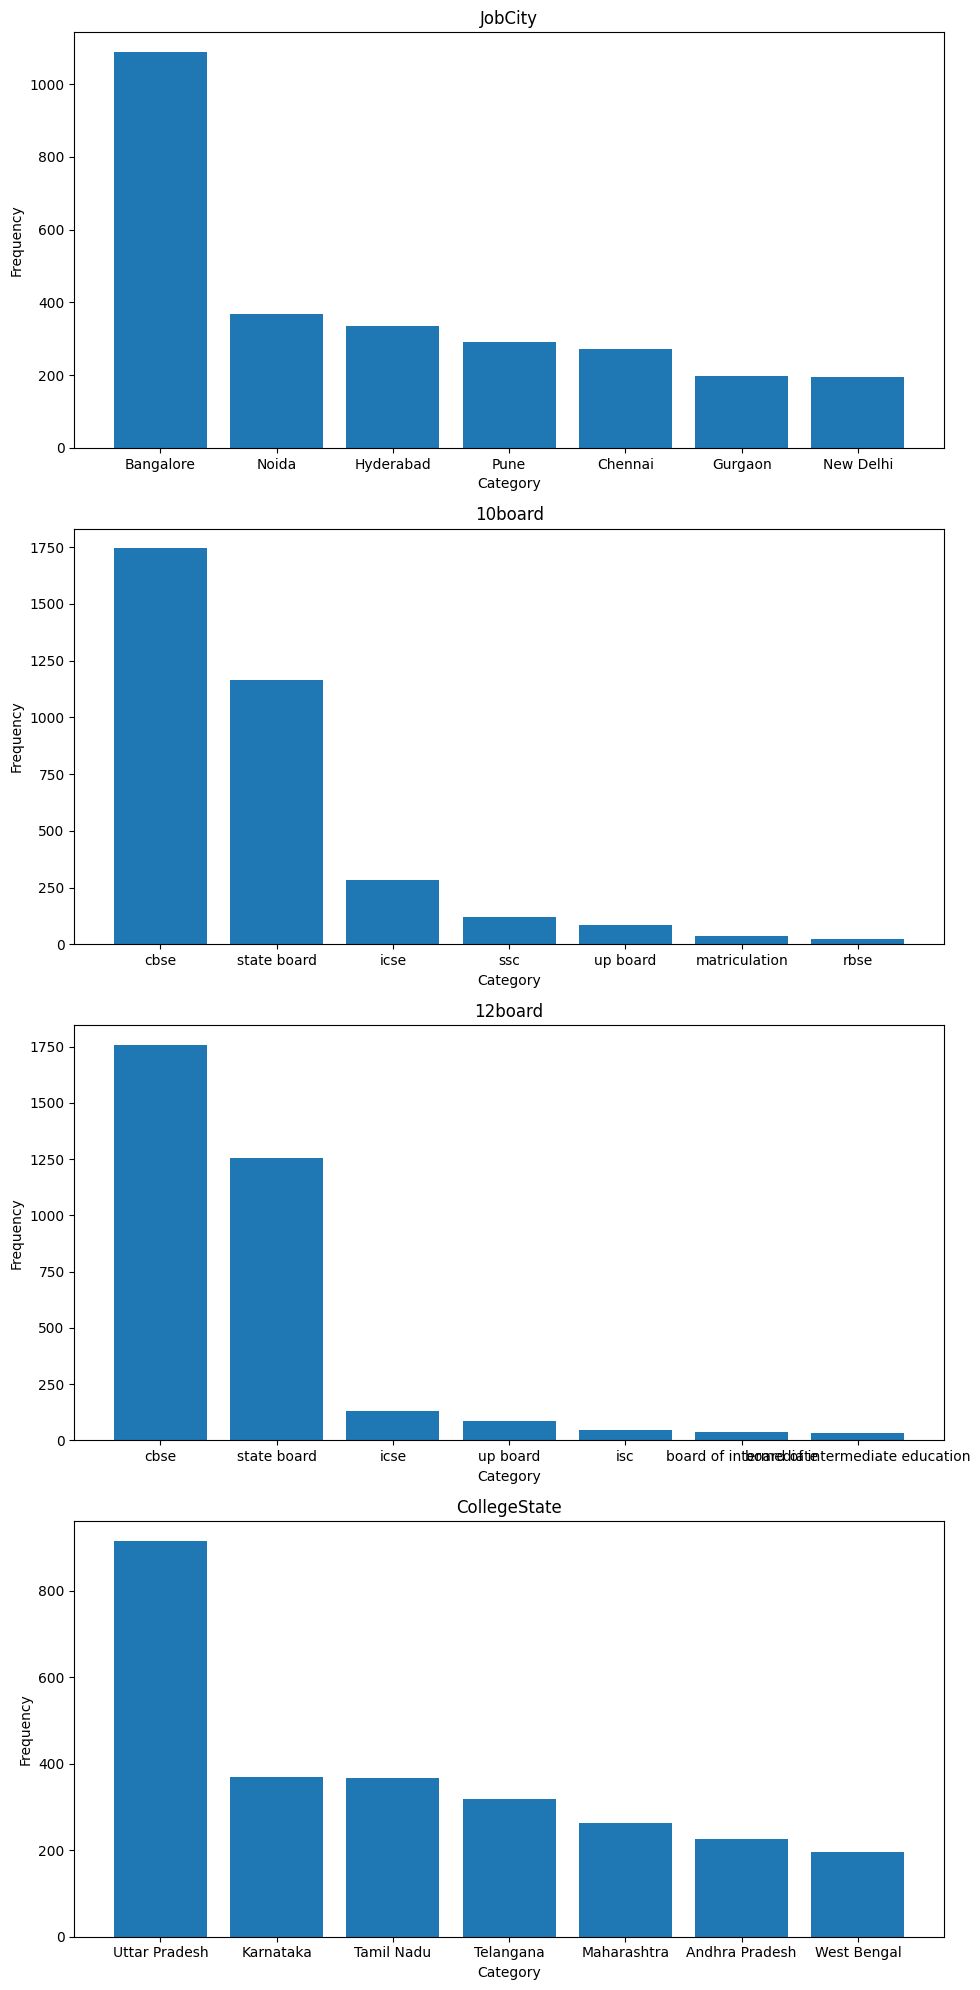

In [ ]:
# Get the categorical variables
categorical_cols = ['JobCity', '10board', '12board', 'CollegeState']

# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=len(categorical_cols), figsize=(10, 20))

# Loop through each categorical variable and plot its frequency
for i, col in enumerate(categorical_cols):
    freq = df[col].value_counts().nlargest(7)

    axs[i].bar(freq.index, freq.values)
    axs[i].set_title(col)
    axs[i].set_xlabel('Category')
    axs[i].set_ylabel('Frequency')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()


**summary statistics for the numerical variables:**

In [ ]:
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate summary statistics
summary_stats = df[numerical_cols].describe()

# Print the summary statistics
print(summary_stats)

             Salary  10percentage  12percentage   collegeGPA      English  \
count  3.998000e+03   3998.000000   3998.000000  3998.000000  3998.000000   
mean   3.076998e+05     77.925443     74.466366    71.486171   501.649075   
std    2.127375e+05      9.850162     10.999933     8.167338   104.940021   
min    3.500000e+04     43.000000     40.000000     6.450000   180.000000   
25%    1.800000e+05     71.680000     66.000000    66.407500   425.000000   
50%    3.000000e+05     79.150000     74.400000    71.720000   500.000000   
75%    3.700000e+05     85.670000     82.600000    76.327500   570.000000   
max    4.000000e+06     97.760000     98.700000    99.930000   875.000000   

           Logical        Quant       Domain  ComputerProgramming  \
count  3998.000000  3998.000000  3998.000000          3998.000000   
mean    501.598799   513.378189     0.510490           353.102801   
std      86.783297   122.302332     0.468671           205.355519   
min     195.000000   120.00000

<ipython-input-27-371dde829abb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary = df.groupby('CollegeTier')['Salary'].median()
<ipython-input-27-371dde829abb>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  highest_salary = df.groupby('CollegeTier')['Salary'].max()
<ipython-input-27-371dde829abb>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lowest_salary = df.groupby('CollegeTier')['Salary'].min()


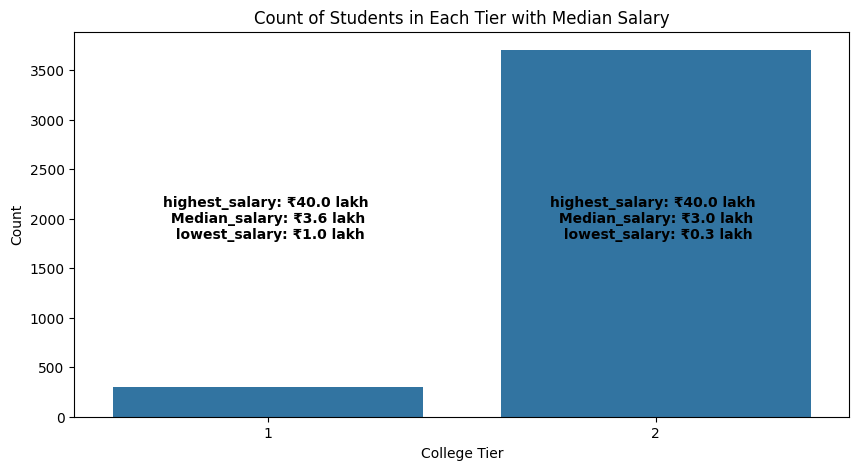

In [ ]:
# Calculate median salary for each tier
median_salary = df.groupby('CollegeTier')['Salary'].median()
highest_salary = df.groupby('CollegeTier')['Salary'].max()
lowest_salary = df.groupby('CollegeTier')['Salary'].min()

# Create the barplot
collegetier_counts=df['CollegeTier'].value_counts()
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=collegetier_counts.index, y=collegetier_counts.values)

# Annotate each bar with the median salary
ax.text(0,2000, f"highest_salary: ₹{highest_salary.iloc[0]/ 100000:.1f} lakh \n Median_salary: ₹{median_salary.iloc[0]/ 100000:.1f} lakh \n lowest_salary: ₹{lowest_salary.iloc[0]/ 100000:.1f} lakh", ha='center', va='center', fontweight='bold')
ax.text(1,2000, f"highest_salary: ₹{highest_salary.iloc[1]/ 100000:.1f} lakh \n Median_salary: ₹{median_salary.iloc[1]/ 100000:.1f} lakh \n lowest_salary: ₹{lowest_salary.iloc[1]/ 100000:.1f} lakh", ha='center', va='center', fontweight='bold')
# Labels and title
plt.xlabel('College Tier')
plt.ylabel('Count')
plt.title('Count of Students in Each Tier with Median Salary')

# Show plot
plt.show()


Univariate analysis

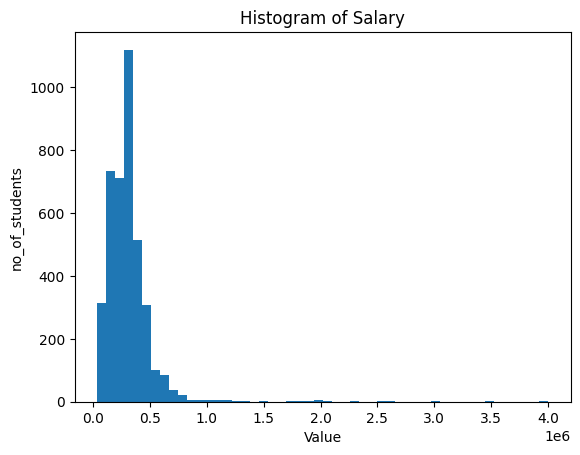

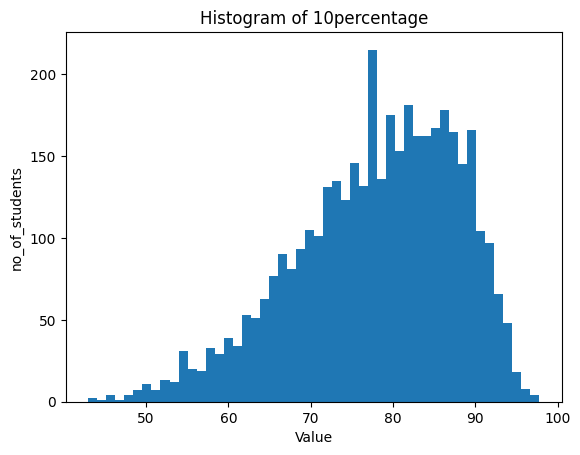

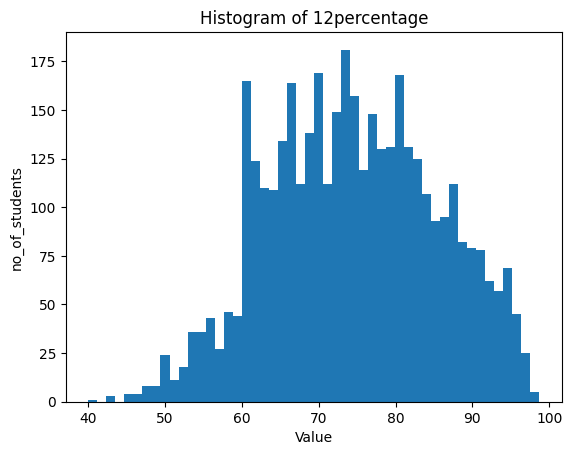

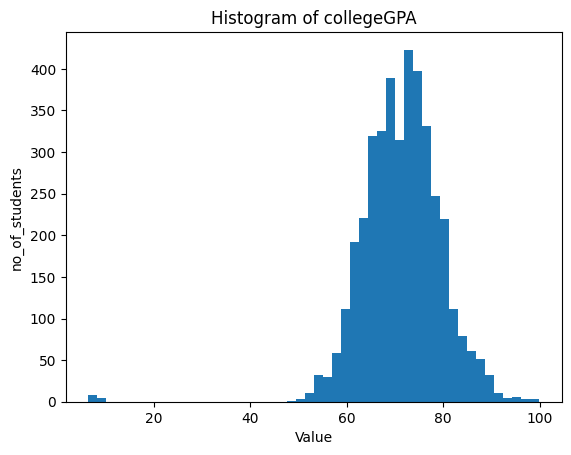

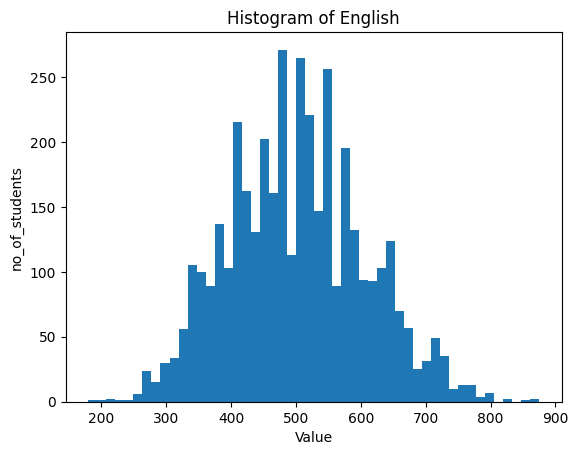

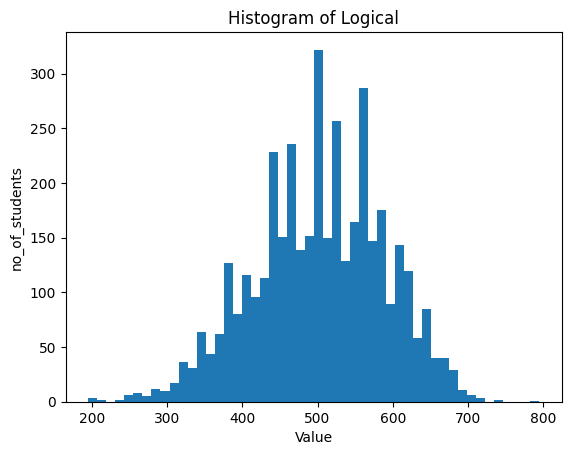

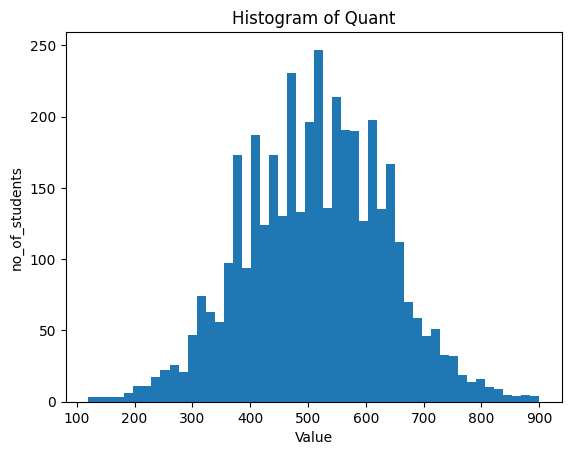

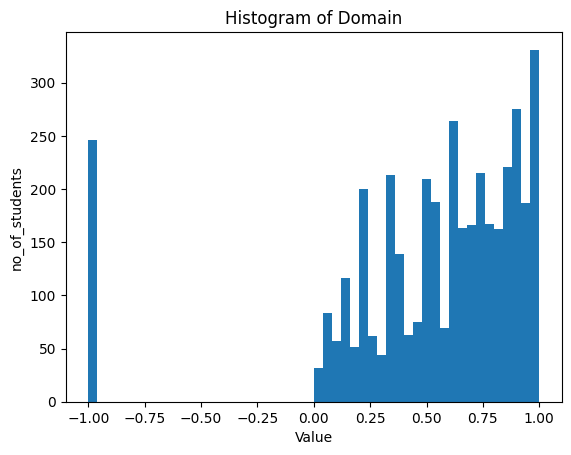

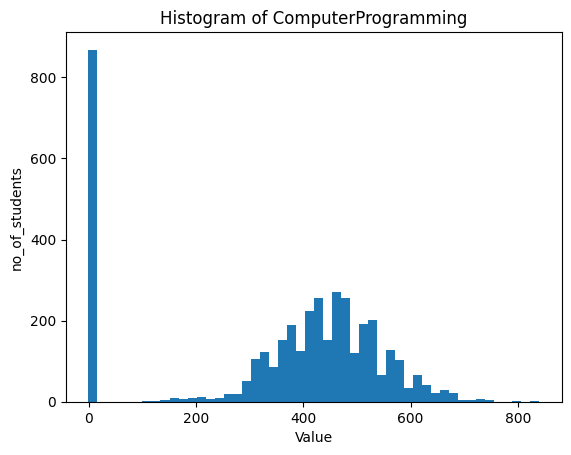

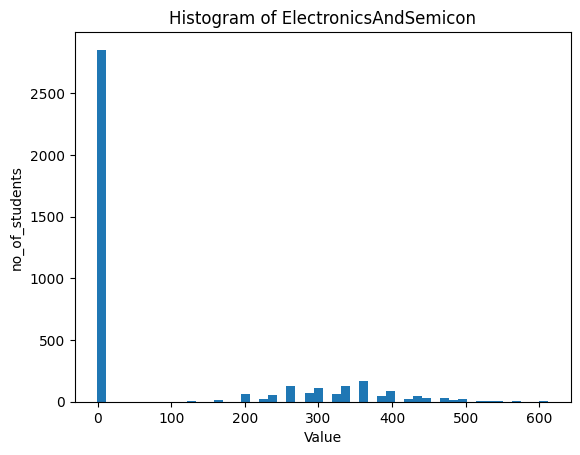

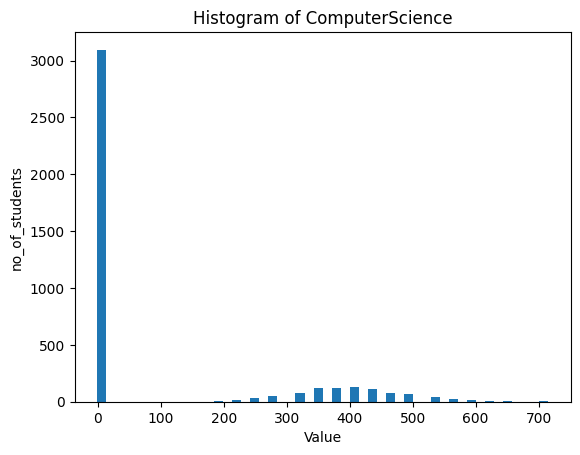

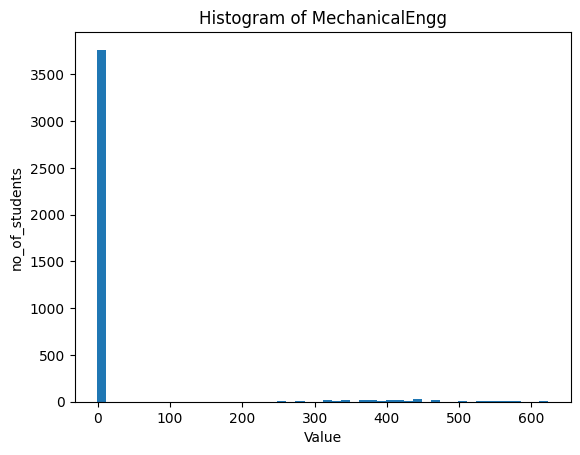

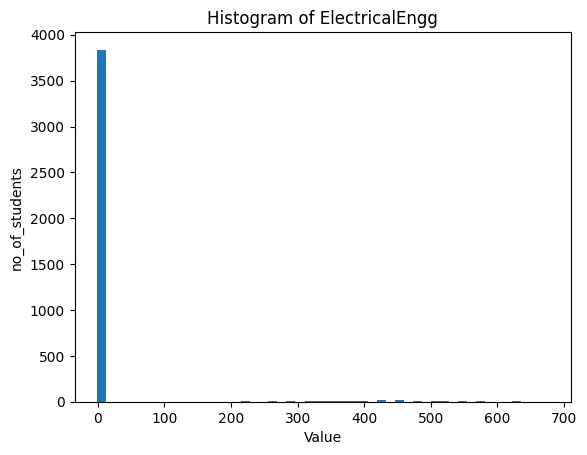

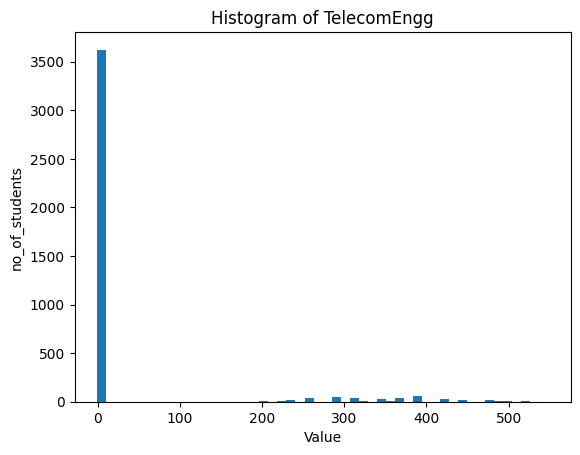

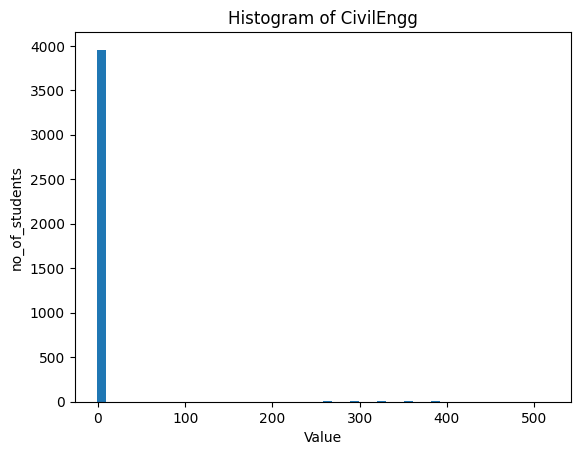

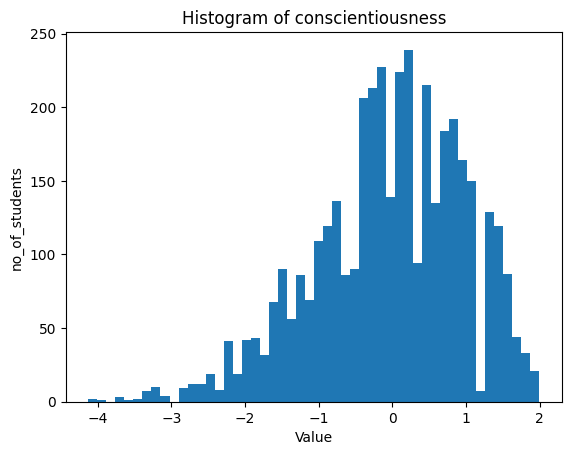

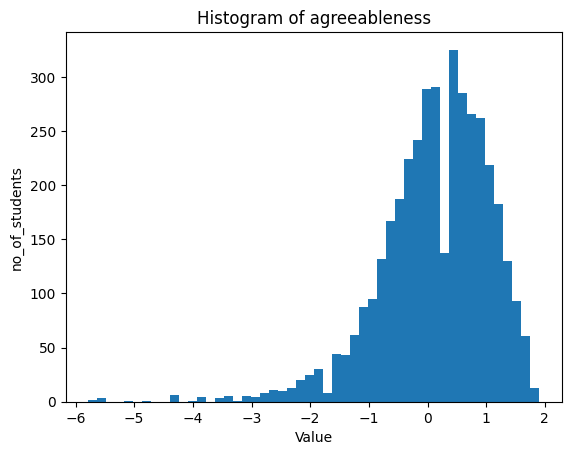

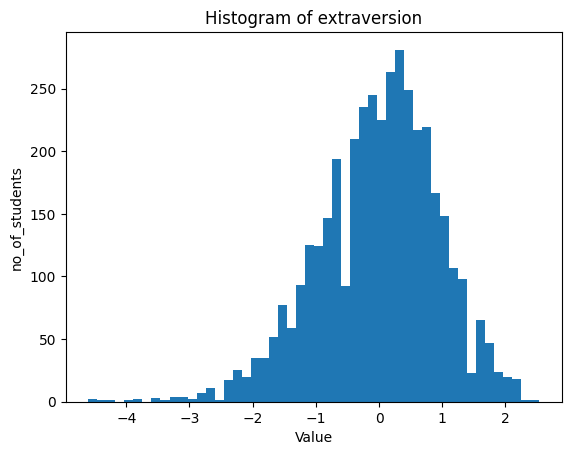

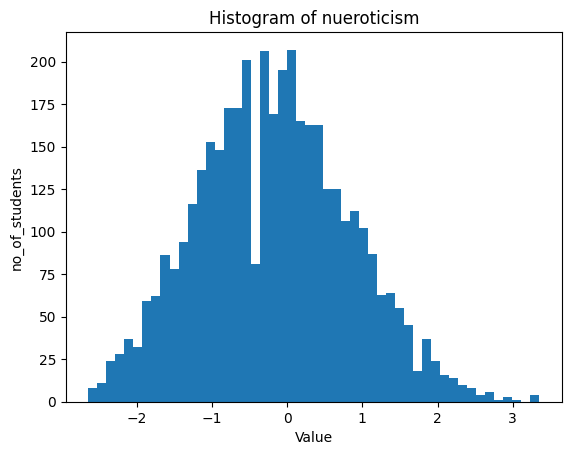

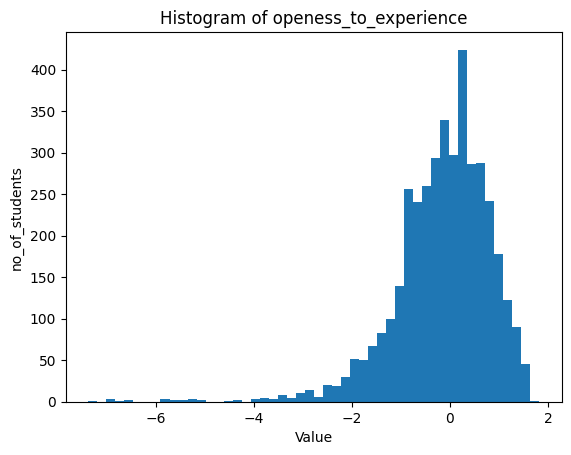

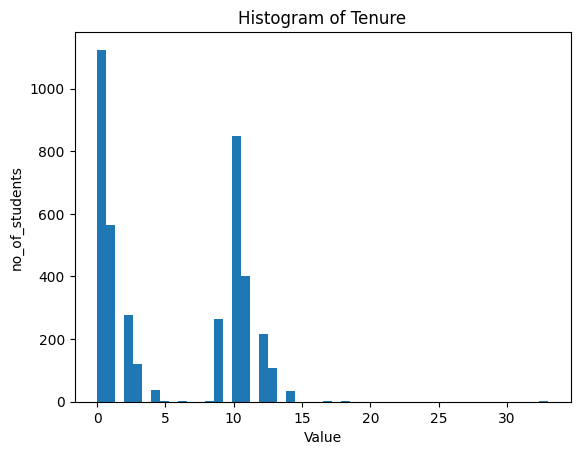

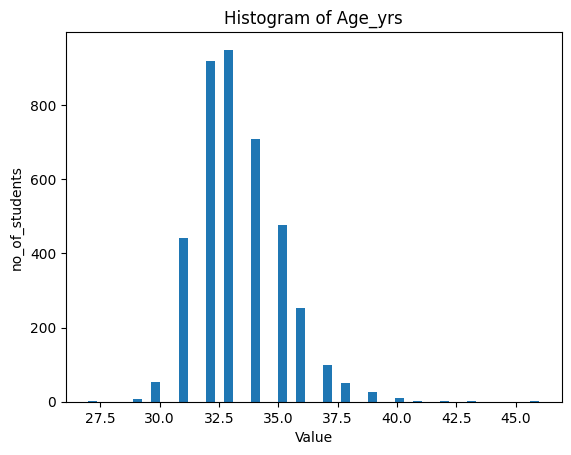

In [ ]:
for col in numerical_cols:
    plt.hist(df[col], bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel("Value")
    plt.ylabel("no_of_students")
    plt.show()

# it is inapproiate to plot histograms for these columns due to these are encoded columns ComputerProgramming	ElectronicsAndSemicon	ComputerScience	MechanicalEngg	ElectricalEngg	TelecomEngg	CivilEngg


# Fliter students based on their main subjects

In [ ]:
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24815 sha256=6971f8d8e777bdf248bfa56c1ef67814e7f12ec4ff0fff0b5c29d17931f38c7a
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


/usr/local/lib/python3.10/dist-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/usr/local/lib/python3.10/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/

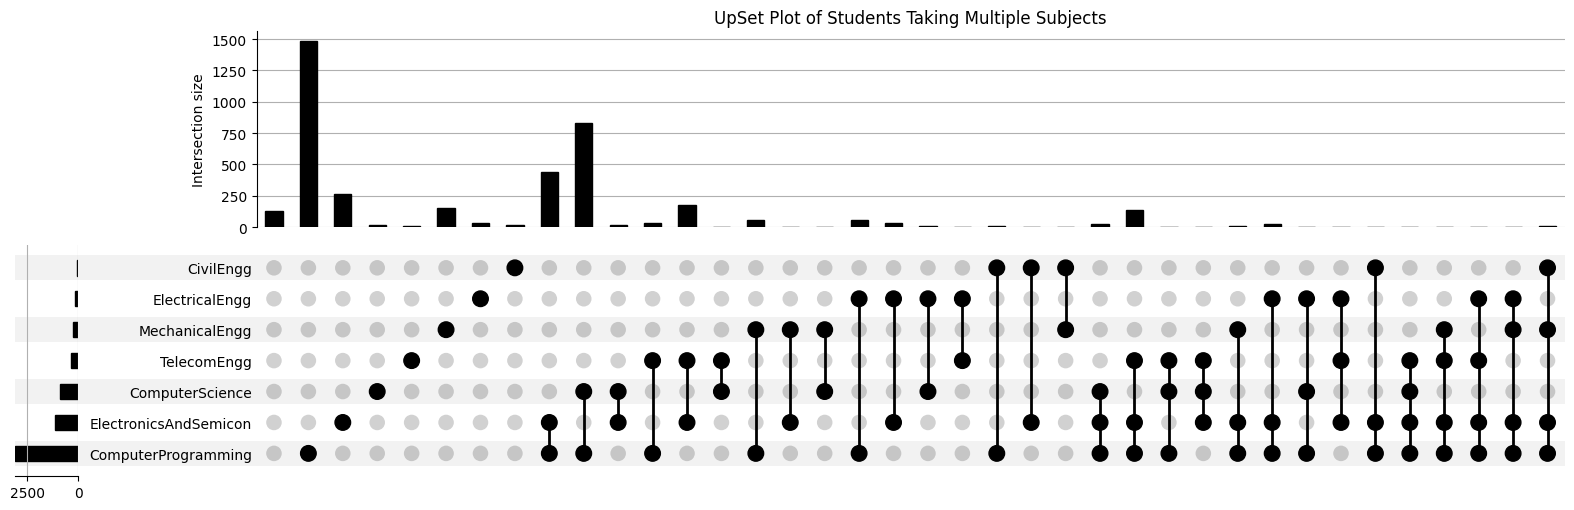

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Define the list of subjects and their filters
subjects = [
    ('ComputerProgramming', df['ComputerProgramming'] > 1),
    ('ComputerScience', df['ComputerScience'] > 1),
    ('ElectronicsAndSemicon', df['ElectronicsAndSemicon'] > 1),
    ('MechanicalEngg', df['MechanicalEngg'] > 1),
    ('ElectricalEngg', df['ElectricalEngg'] > 1),
    ('TelecomEngg', df['TelecomEngg'] > 1),
    ('CivilEngg', df['CivilEngg'] > 1),
]

# Generate membership combinations based on subject participation
memberships = []
for idx, row in df.iterrows():
    membership = []
    for subject, condition in subjects:
        if condition.iloc[idx]:  # If the student took the subject
            membership.append(subject)
    memberships.append(membership)

# Create the UpSet plot data from the memberships
upset_data = from_memberships(memberships, data=[1] * len(memberships))

# Plot the UpSet plot
upset = UpSet(upset_data, subset_size='count', sort_by='degree')
upset.plot()

plt.title('UpSet Plot of Students Taking Multiple Subjects')
plt.show()


In [ ]:
no_of_students = df.shape[0]
print(f"Total number of students: {no_of_students}")
ComputerProgramming_students = df[df['ComputerProgramming'] > 1]
ComputerScience_students = df[df['ComputerScience'] > 1]
ElectronicsAndSemicon_students = df[df['ElectronicsAndSemicon'] > 1]
MechanicalEngg_students = df[df['MechanicalEngg'] > 1]
ElectricalEngg_students = df[df['ElectricalEngg'] > 1]
TelecomEngg_students = df[df['TelecomEngg'] > 1]
CivilEngg_students = df[df['CivilEngg'] > 1]

Total number of students: 3998


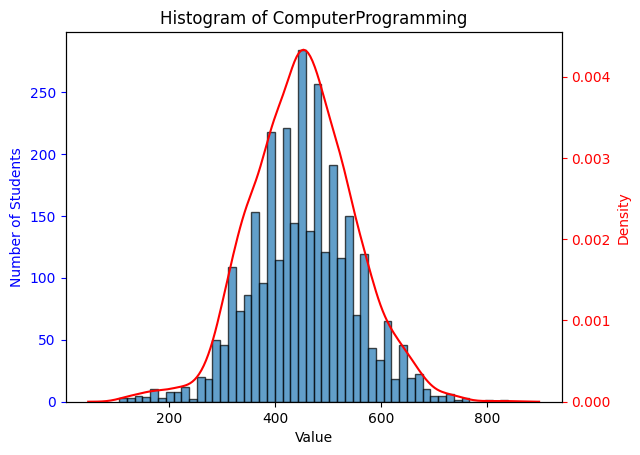

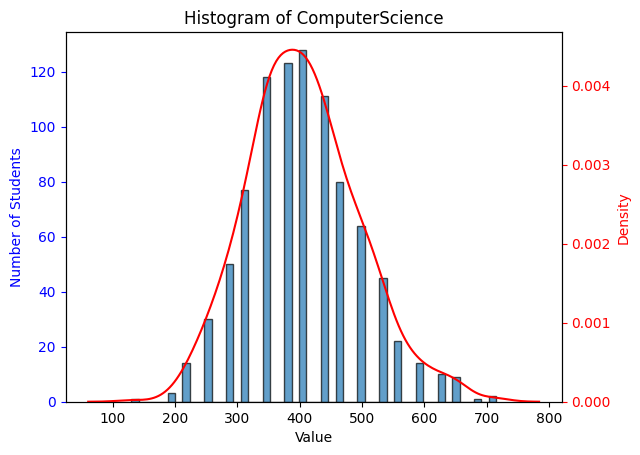

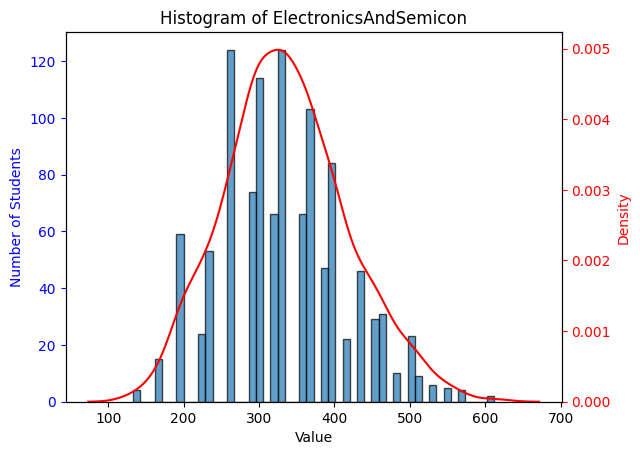

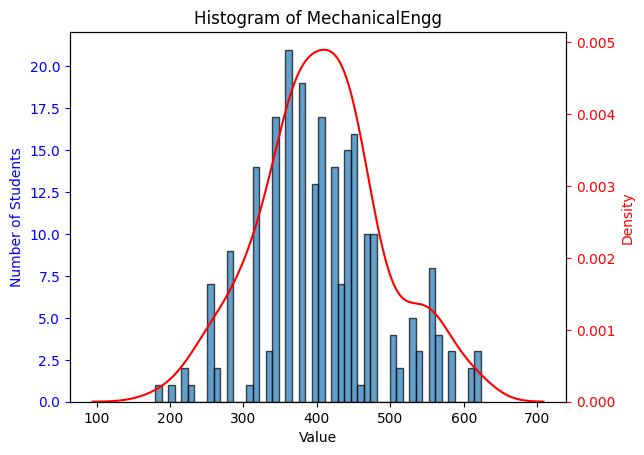

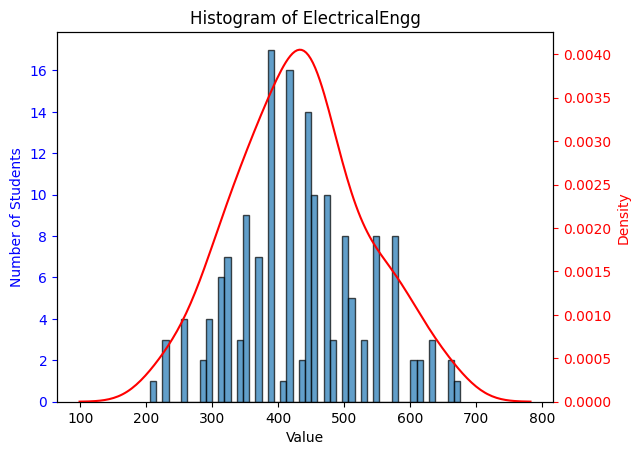

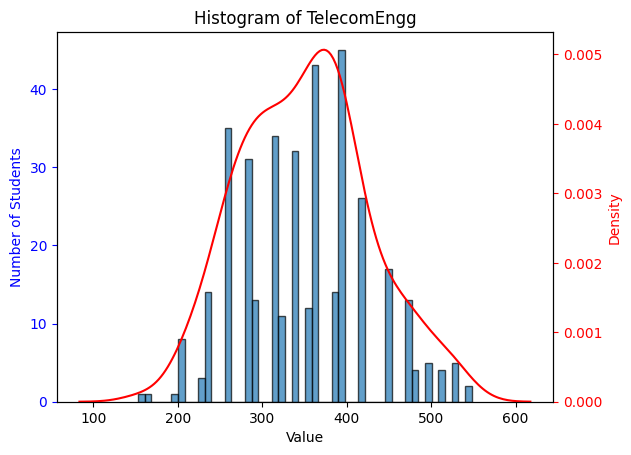

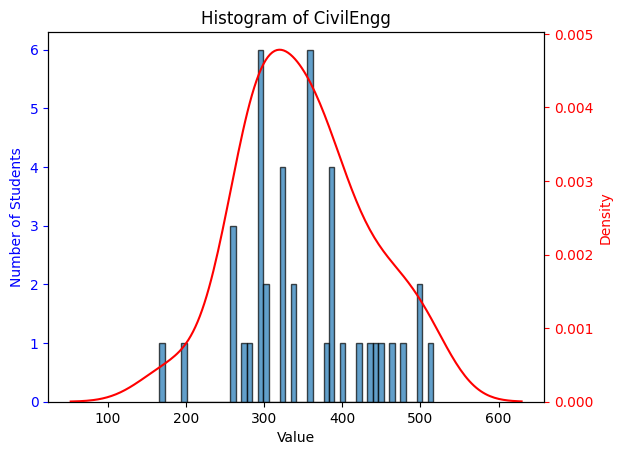

In [ ]:

# List of subjects with their respective data
subjects = [
    ('ComputerProgramming', ComputerProgramming_students['ComputerProgramming']),
    ('ComputerScience', ComputerScience_students['ComputerScience']),
    ('ElectronicsAndSemicon', ElectronicsAndSemicon_students['ElectronicsAndSemicon']),
    ('MechanicalEngg', MechanicalEngg_students['MechanicalEngg']),
    ('ElectricalEngg', ElectricalEngg_students['ElectricalEngg']),
    ('TelecomEngg', TelecomEngg_students['TelecomEngg']),
    ('CivilEngg', CivilEngg_students['CivilEngg'])
]

# Plot histograms for each subject with titles
for subject_name, subject_data in subjects:
    fig, ax1 = plt.subplots()

    # Plot histogram
    ax1.hist(subject_data, bins=50, alpha=0.7, edgecolor='black')
    ax1.set_title(f"Histogram of {subject_name}")  # Add dynamic title based on the subject
    ax1.set_xlabel("Value")
    ax1.set_ylabel("Number of Students", color='b')
    ax1.tick_params('y', colors='b')

    # Create a second axis for the KDE plot
    ax2 = ax1.twinx()

    # Plot KDE
    sns.kdeplot(subject_data, ax=ax2, color='r')
    ax2.set_ylabel("Density", color='r')
    ax2.tick_params('y', colors='r')

    # Show the plot
    plt.show()

In [ ]:
# Create a dictionary to store the salary statistics
salary_stats = {}
subjects_1= [
    ('ComputerProgramming', ComputerProgramming_students),
    ('ComputerScience', ComputerScience_students),
    ('ElectronicsAndSemicon', ElectronicsAndSemicon_students),
    ('MechanicalEngg', MechanicalEngg_students),
    ('ElectricalEngg', ElectricalEngg_students),
    ('TelecomEngg', TelecomEngg_students),
    ('CivilEngg', CivilEngg_students)
]


# Calculate and store the max, min, and median salary for each subject
for subject_name, subject_data in subjects_1:
    max_salary = subject_data['Salary'].max()
    min_salary = subject_data['Salary'].min()
    median_salary = subject_data['Salary'].median()

    salary_stats[subject_name] = {
        'Max Salary': max_salary,
        'Min Salary': min_salary,
        'Median Salary': median_salary
    }

# Display the salary statistics for each subject
for subject, stats in salary_stats.items():
    print(f"Salary statistics for {subject}:")
    print(f"  Max Salary: {stats['Max Salary']}")
    print(f"  Min Salary: {stats['Min Salary']}")
    print(f"  Median Salary: {stats['Median Salary']}\n")


Salary statistics for ComputerProgramming:
  Max Salary: 4000000.0
  Min Salary: 35000.0
  Median Salary: 300000.0

Salary statistics for ComputerScience:
  Max Salary: 2050000.0
  Min Salary: 35000.0
  Median Salary: 240000.0

Salary statistics for ElectronicsAndSemicon:
  Max Salary: 2300000.0
  Min Salary: 45000.0
  Median Salary: 300000.0

Salary statistics for MechanicalEngg:
  Max Salary: 1300000.0
  Min Salary: 60000.0
  Median Salary: 280000.0

Salary statistics for ElectricalEngg:
  Max Salary: 700000.0
  Min Salary: 40000.0
  Median Salary: 230000.0

Salary statistics for TelecomEngg:
  Max Salary: 1800000.0
  Min Salary: 45000.0
  Median Salary: 290000.0

Salary statistics for CivilEngg:
  Max Salary: 800000.0
  Min Salary: 60000.0
  Median Salary: 332500.0



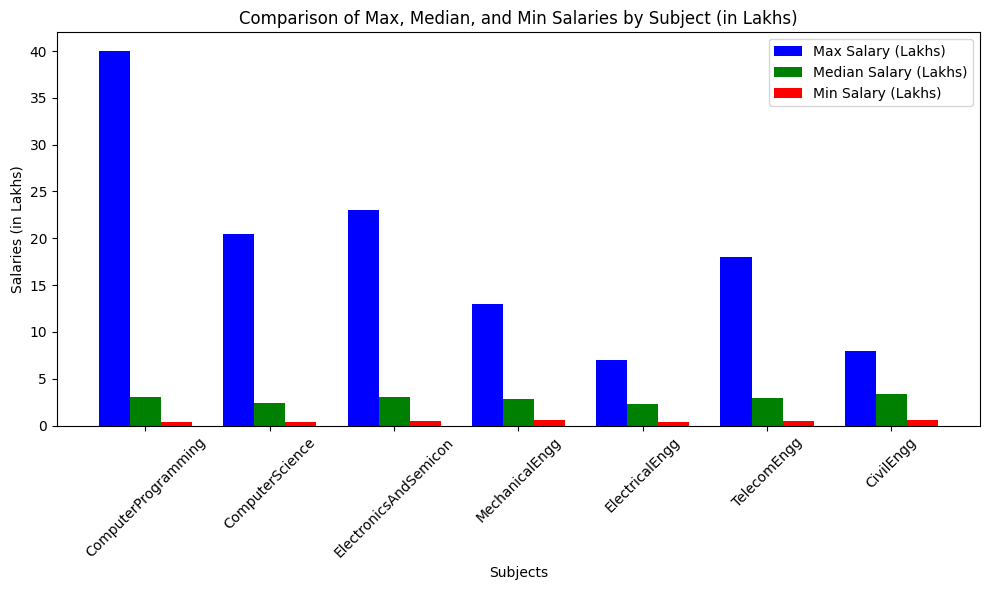

In [ ]:
# Extracting subject names and salary statistics
subject_names = list(salary_stats.keys())
max_salaries = [stats['Max Salary'] / 100000 for stats in salary_stats.values()]  # Convert to lakhs
min_salaries = [stats['Min Salary'] / 100000 for stats in salary_stats.values()]  # Convert to lakhs
median_salaries = [stats['Median Salary'] / 100000 for stats in salary_stats.values()]  # Convert to lakhs

# Plotting the max, min, and median salaries in lakhs
x = np.arange(len(subject_names))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for max, min, and median salaries
rects1 = ax.bar(x - width, max_salaries, width, label='Max Salary (Lakhs)', color='blue')
rects2 = ax.bar(x, median_salaries, width, label='Median Salary (Lakhs)', color='green')
rects3 = ax.bar(x + width, min_salaries, width, label='Min Salary (Lakhs)', color='red')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Subjects')
ax.set_ylabel('Salaries (in Lakhs)')
ax.set_title('Comparison of Max, Median, and Min Salaries by Subject (in Lakhs)')
ax.set_xticks(x)
ax.set_xticklabels(subject_names)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


salary based on locations

In [ ]:
 # Top 7 jobcities with studentcount
 City_stats = df['JobCity'].value_counts().nlargest(7)
 print(City_stats)

JobCity
Bangalore    1088
Noida         368
Hyderabad     335
Pune          290
Chennai       272
Gurgaon       198
New Delhi     196
Name: count, dtype: int64


                 max      min    median
JobCity                                
Bangalore  3000000.0  40000.0  315000.0
Chennai     700000.0  50000.0  300000.0
Gurgaon    1300000.0  35000.0  300000.0
Hyderabad  1500000.0  65000.0  300000.0
New Delhi  4000000.0  70000.0  215000.0
Noida      2050000.0  35000.0  272500.0
Pune       3500000.0  80000.0  325000.0


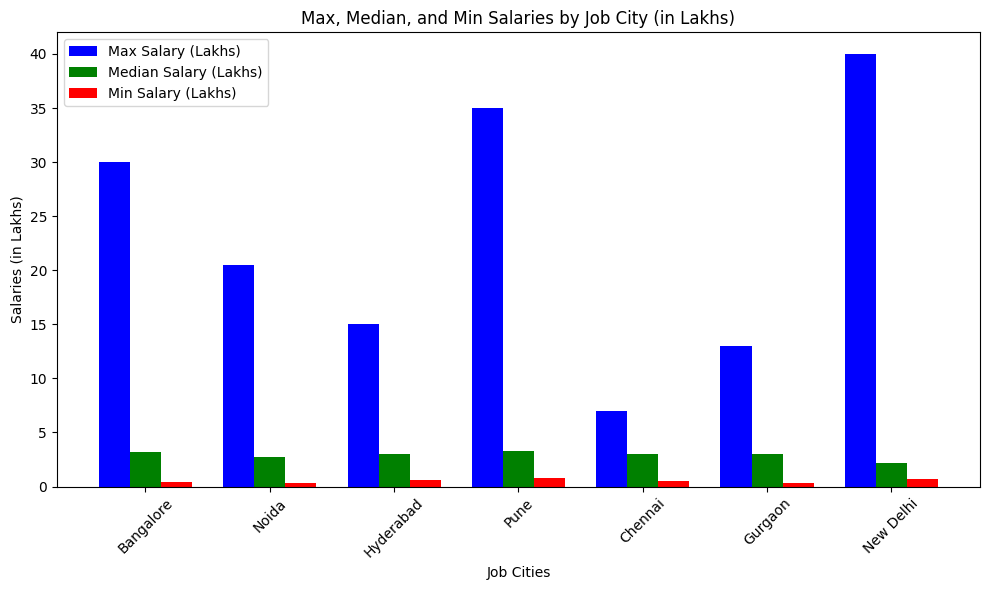

In [ ]:
selected_cities = ['Bangalore', 'Noida', 'Hyderabad', 'Pune', 'Chennai', 'Gurgaon', 'New Delhi']
# Group by jobcity and calculate max, min, and median salaries
salary_by_city = df[df['JobCity'].isin(selected_cities)].groupby('JobCity')['Salary'].agg(['max', 'min', 'median'])

# Display the salary statistics for the selected cities
print(salary_by_city)

# Sort by job city for consistent plotting
salary_by_city = salary_by_city.reindex(selected_cities)

# Extract the salary data for plotting
cities = salary_by_city.index
max_salaries = salary_by_city['max'] / 100000  # Convert to lakhs
min_salaries = salary_by_city['min'] / 100000  # Convert to lakhs
median_salaries = salary_by_city['median'] / 100000  # Convert to lakhs

# Plotting the max, min, and median salaries
x = np.arange(len(cities))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for max, median, and min salaries
rects1 = ax.bar(x - width, max_salaries, width, label='Max Salary (Lakhs)', color='blue')
rects2 = ax.bar(x, median_salaries, width, label='Median Salary (Lakhs)', color='green')
rects3 = ax.bar(x + width, min_salaries, width, label='Min Salary (Lakhs)', color='red')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Job Cities')
ax.set_ylabel('Salaries (in Lakhs)')
ax.set_title('Max, Median, and Min Salaries by Job City (in Lakhs)')
ax.set_xticks(x)
ax.set_xticklabels(cities)
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()






Transforming columns and dropping redundant columns

In [ ]:
df

Salary                  Designation           JobCity Gender  \
0      420000.0      senior quality engineer         Bangalore      f   
1      500000.0            assistant manager            Indore      m   
2      325000.0             systems engineer           Chennai      f   
3     1100000.0     senior software engineer           Gurgaon      m   
4      200000.0                          get           Manesar      m   
...         ...                          ...               ...    ...   
3993   280000.0            software engineer        New Delhi       m   
3994   100000.0             technical writer         Hyderabad      f   
3995   320000.0  associate software engineer         Bangalore      m   
3996   200000.0           software developer  Asifabadbanglore      f   
3997   400000.0      senior systems engineer           Chennai      f   

      10percentage                         10board 12graduation  12percentage  \
0            84.30  board ofsecondary education,ap         2007         95.80   
1            85.40                            cbse         2007         85.00   
2            85.00                            cbse         2010         68.20   
3            85.60                            cbse         2007         83.60   
4            78.00                            cbse         2008         76.80   
...            ...                             ...          ...           ...   
3993         52.09                            cbse         2006         55.50   
3994         90.00                     state board         2009         93.00   
3995         81.86                      bse,odisha         2008         65.50   
3996         78.72                     state board         2010         69.88   
3997         70.60                            cbse         2008         68.00   

                                 12board CollegeID  ... TelecomEngg CivilEngg  \
0     board of intermediate education,ap      1141  ...          -1        -1   
1                                   cbse      5807  ...          -1        -1   
2                                   cbse        64  ...          -1        -1   
3                                   cbse      6920  ...          -1        -1   
4                                   cbse     11368  ...          -1        -1   
...                                  ...       ...  ...         ...       ...   
3993                                cbse      6268  ...          -1        -1   
3994                         state board      4883  ...          -1        -1   
3995                         chse,odisha      9786  ...          -1        -1   
3996                         state board       979  ...          -1        -1   
3997                                cbse      6609  ...          -1        -1   

     conscientiousness  agreeableness extraversion nueroticism  \
0               0.9737         0.8128       0.5269     1.35490   
1              -0.7335         0.3789       1.2396    -0.10760   
2               0.2718         1.7109       0.1637    -0.86820   
3               0.0464         0.3448      -0.3440    -0.40780   
4              -0.8810        -0.2793      -1.0697     0.09163   
...                ...            ...          ...         ...   
3993           -0.1082         0.3448       0.2366     0.64980   
3994           -0.3027         0.8784       0.9322     0.77980   
3995           -1.5765        -1.5273      -1.5051    -1.31840   
3996           -0.1590         0.0459      -0.4511    -0.36120   
3997           -1.1128        -0.2793      -0.6343     1.32553   

      openess_to_experience          JobCity   Tenure  Age_yrs  
0                   -0.4455         Bangalore      12       34  
1                    0.8637            Indore      11       34  
2                    0.6721           Chennai      10       32  
3                   -0.9194           Gurgaon      13       34  
4                   -0.1295           Manesar       0       33  
...

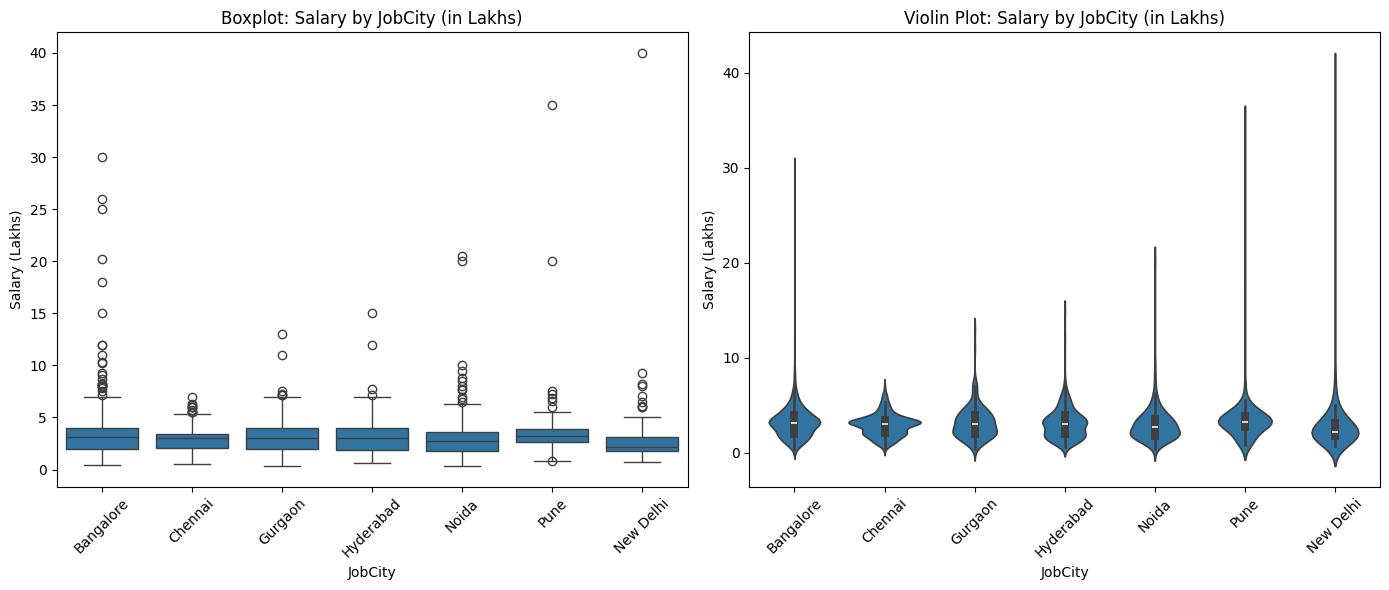

In [ ]:

filtered_df = df[df['JobCity'].isin(selected_cities)].copy()

# Convert Salary to Lakhs
filtered_df['Salary_lakhs'] = filtered_df['Salary'] / 100000

# Create subplots for side-by-side boxplot and violin plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
sns.boxplot(x='JobCity', y='Salary_lakhs', data=filtered_df, ax=axes[0])
axes[0].set_title('Boxplot: Salary by JobCity (in Lakhs)')
axes[0].set_xlabel('JobCity')
axes[0].set_ylabel('Salary (Lakhs)')
axes[0].tick_params(axis='x', rotation=45)

# Violin plot
sns.violinplot(x='JobCity', y='Salary_lakhs', data=filtered_df, ax=axes[1])
axes[1].set_title('Violin Plot: Salary by JobCity (in Lakhs)')
axes[1].set_xlabel('JobCity')
axes[1].set_ylabel('Salary (Lakhs)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Salary                 3998 non-null   float64 
 1   Designation            3998 non-null   object  
 2   JobCity                3998 non-null   object  
 3   Gender                 3998 non-null   object  
 4   10percentage           3998 non-null   float64 
 5   10board                3998 non-null   object  
 6   12graduation           3998 non-null   category
 7   12percentage           3998 non-null   float64 
 8   12board                3998 non-null   object  
 9   CollegeID              3998 non-null   category
 10  CollegeTier            3998 non-null   category
 11  Degree                 3998 non-null   object  
 12  Specialization         3998 non-null   object  
 13  collegeGPA             3998 non-null   float64 
 14  CollegeState           3998 non-null   o

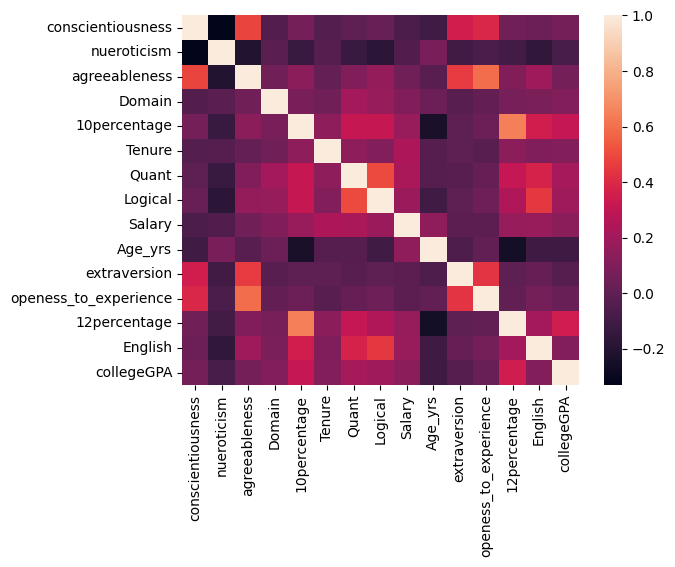

In [ ]:
# Drop non-numerical variables
numerical = list(set(
        [
            "Salary",
            "10percentage",
            "12percentage",
            "collegeGPA",
            "English",
            "Logical",
            "Quant",
            "Domain",
            "conscientiousness",
            "agreeableness",
            "extraversion",
            "nueroticism",
            "openess_to_experience",
            "Tenure",
            "Age_yrs",
        ]
    ))


# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

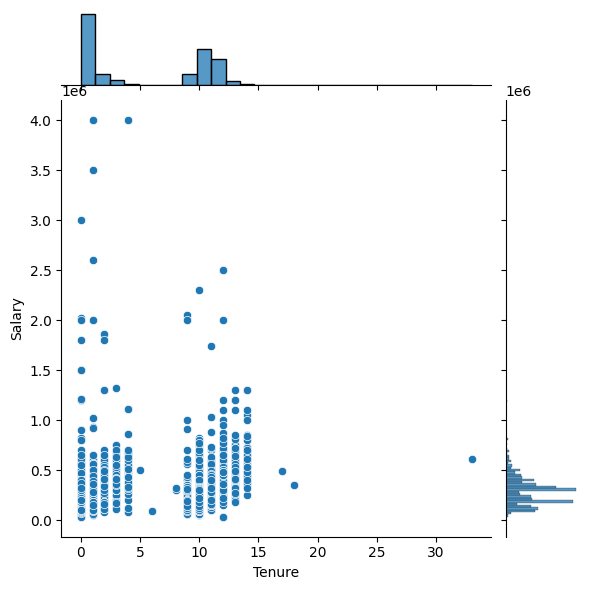

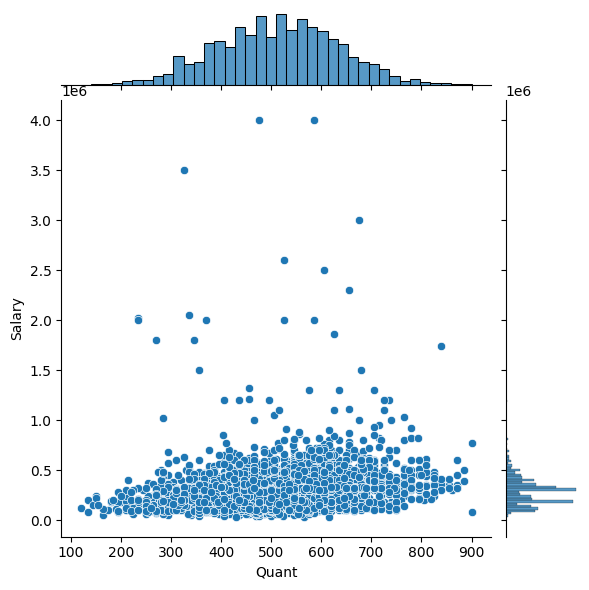

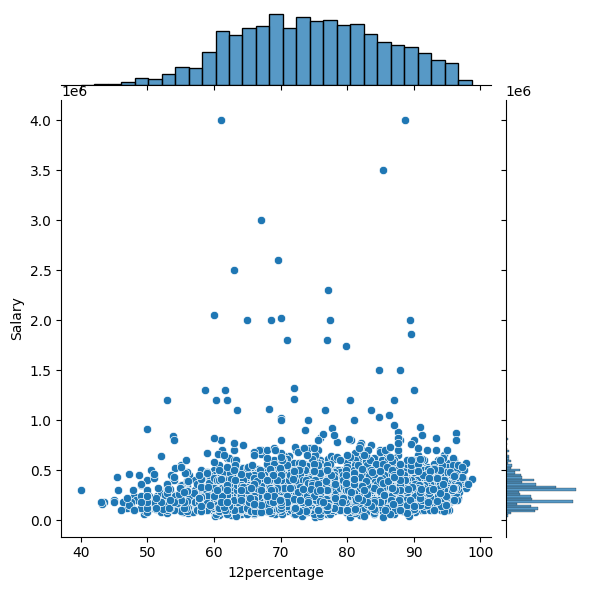

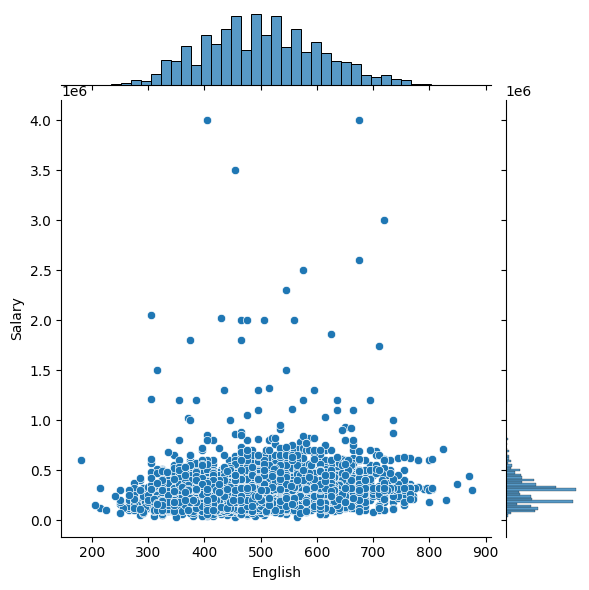

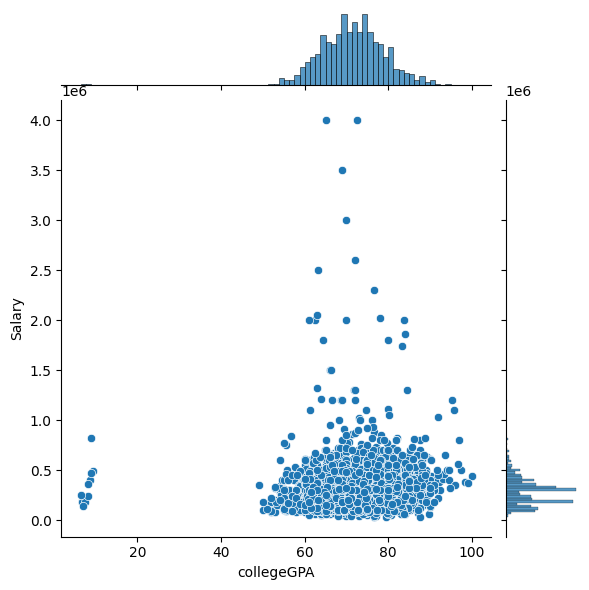

In [ ]:
sns.jointplot(x="Tenure", y="Salary", data=df, kind="scatter")
sns.jointplot(x="Quant", y="Salary", data=df, kind="scatter")
sns.jointplot(x="12percentage", y="Salary", data=df, kind="scatter")
sns.jointplot(x="English", y="Salary", data=df, kind="scatter")
sns.jointplot(x="collegeGPA", y="Salary", data=df, kind="scatter")
plt.show()

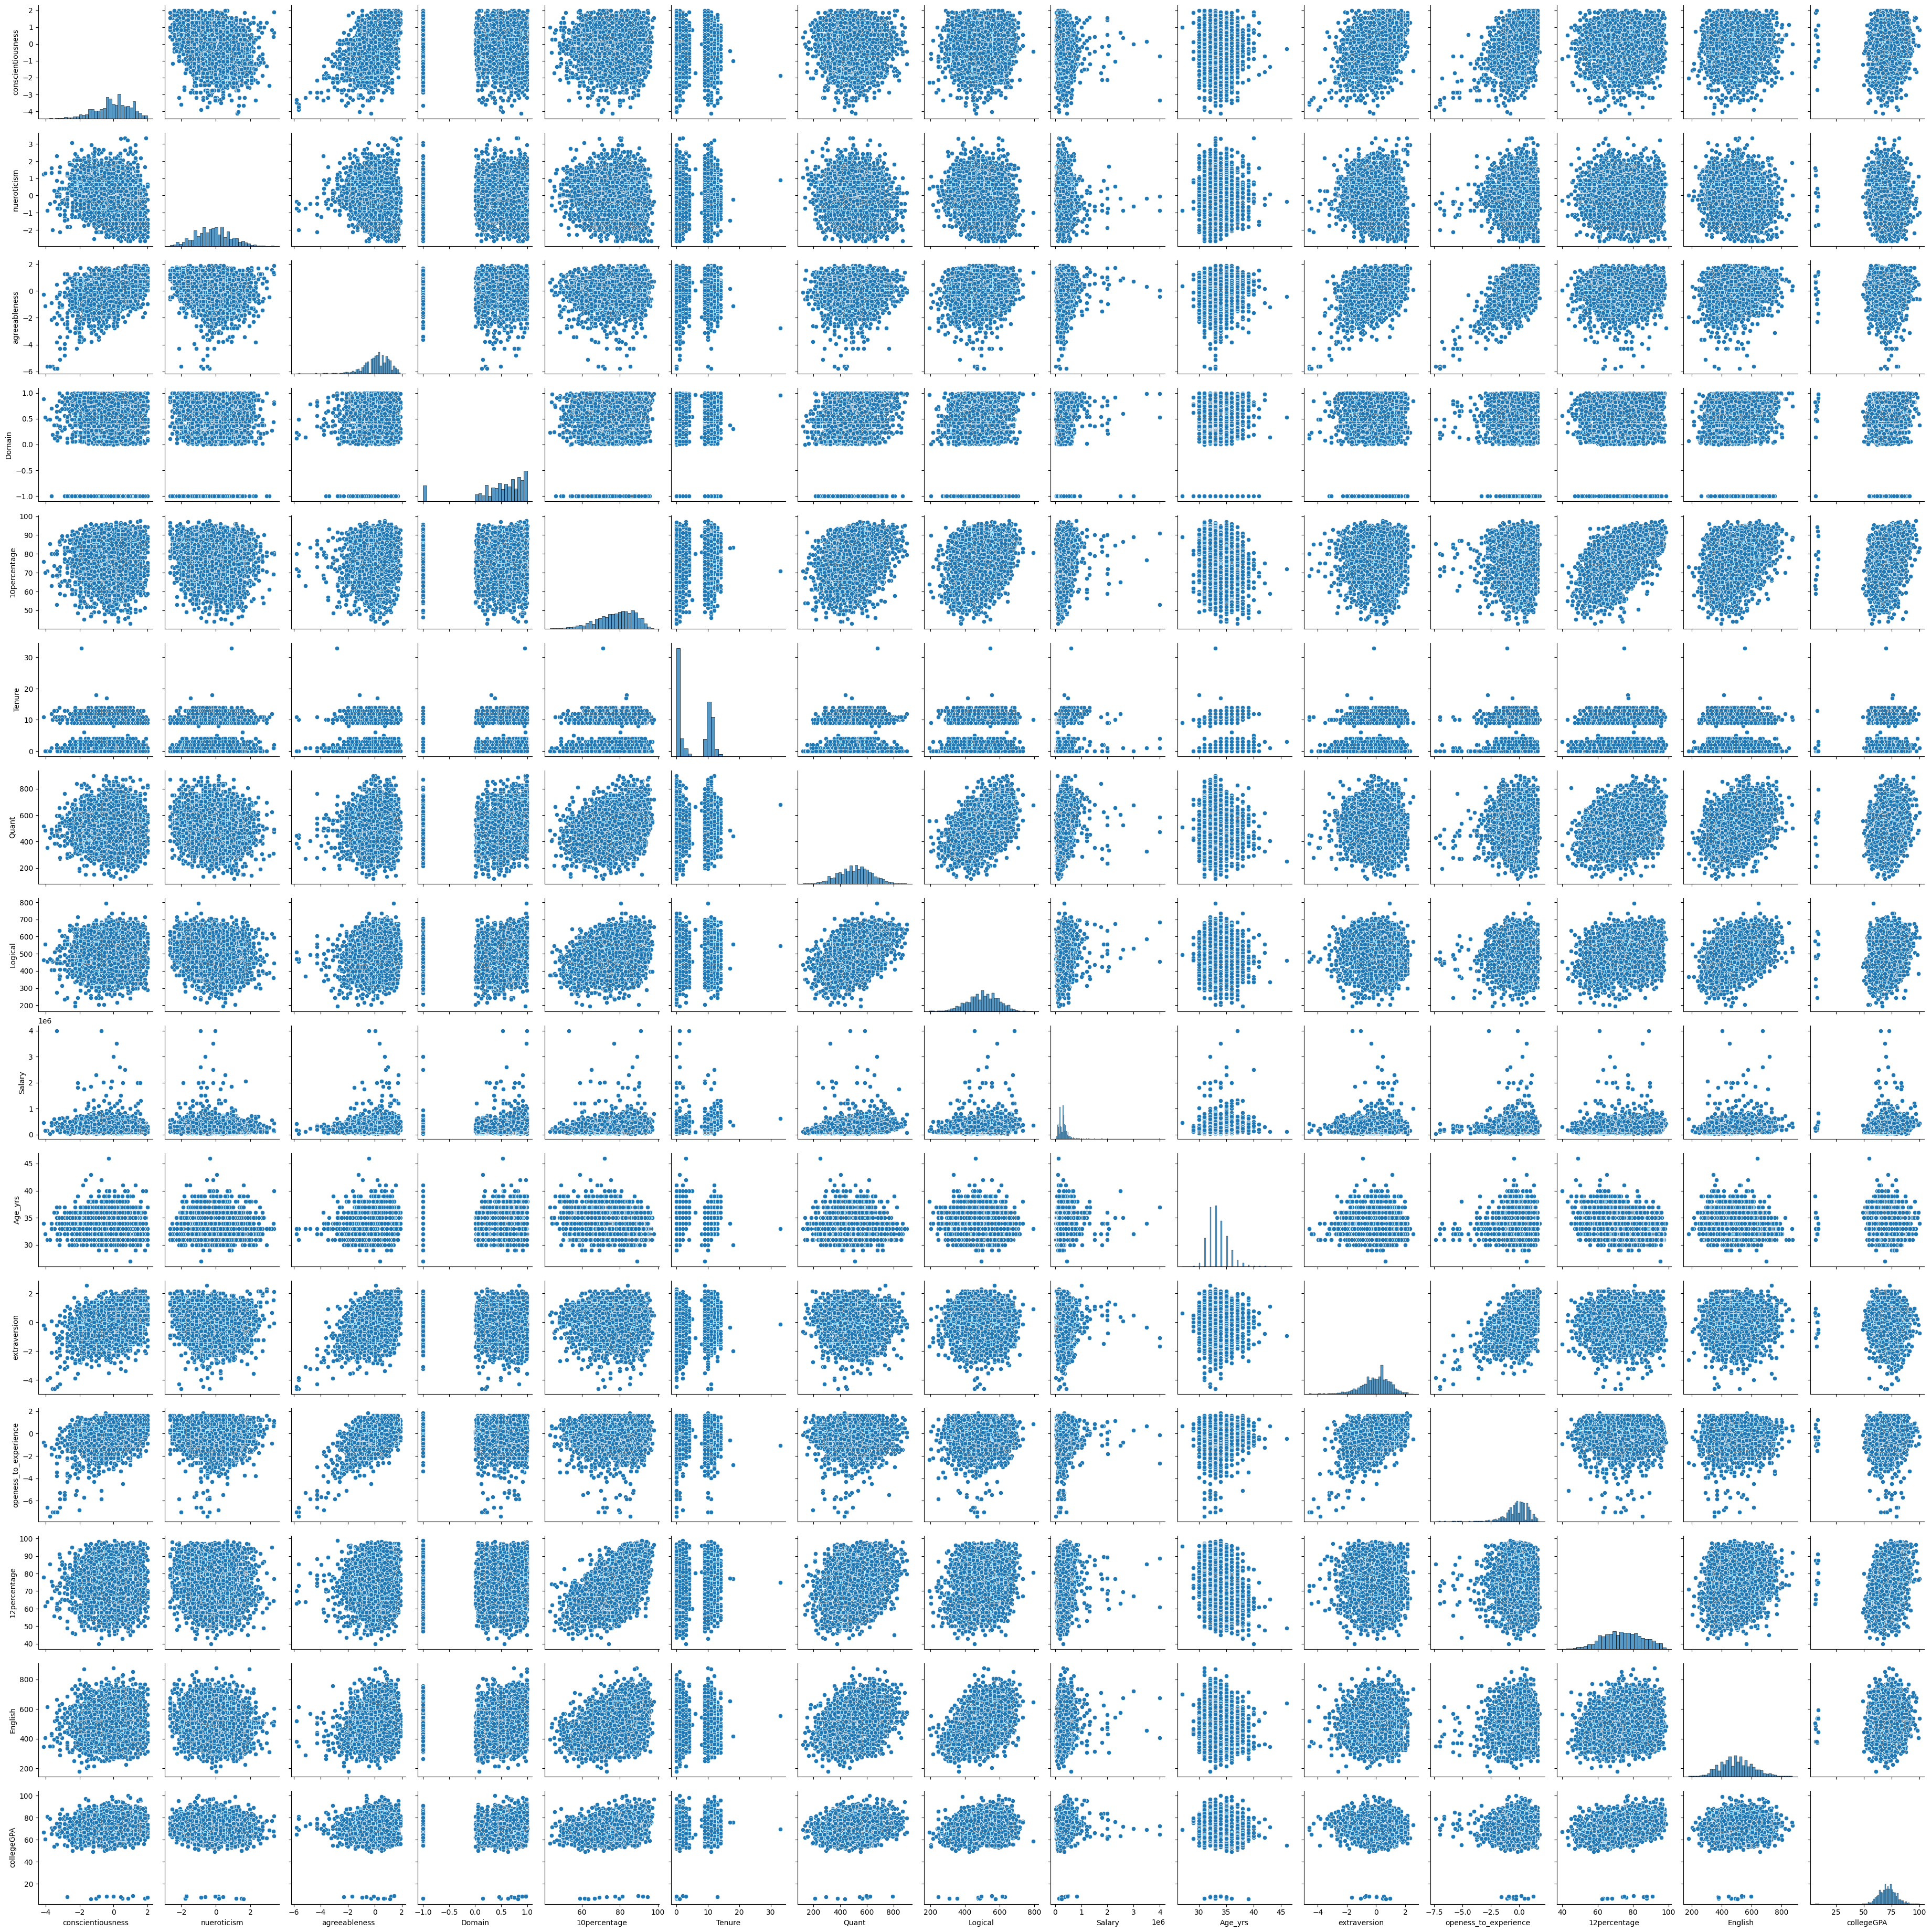

In [ ]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])
plt.show()

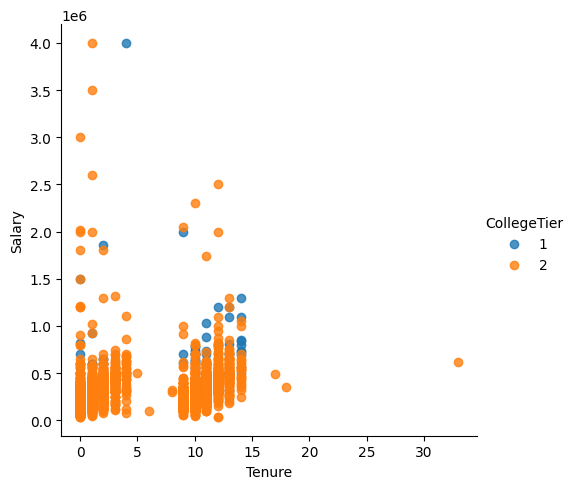

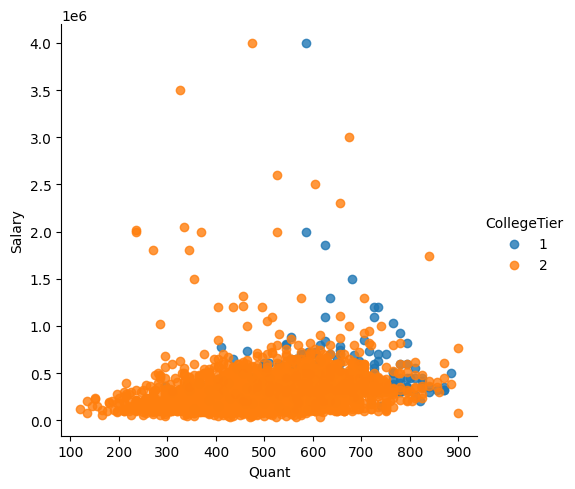

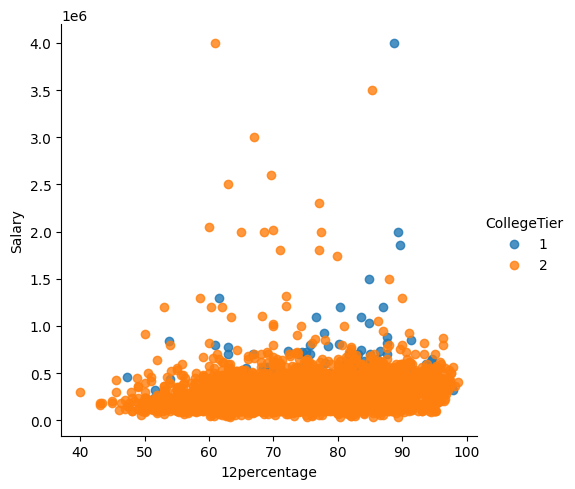

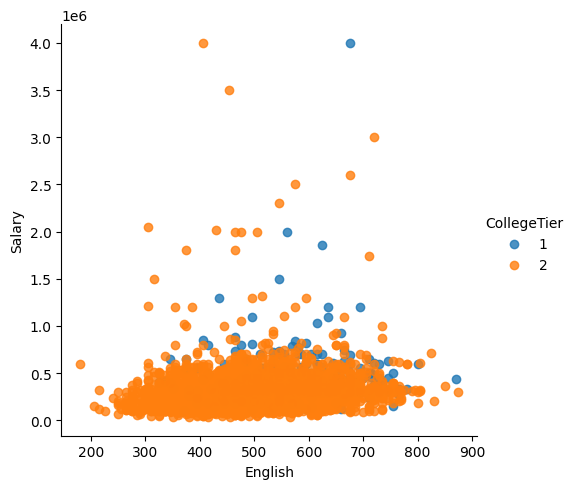

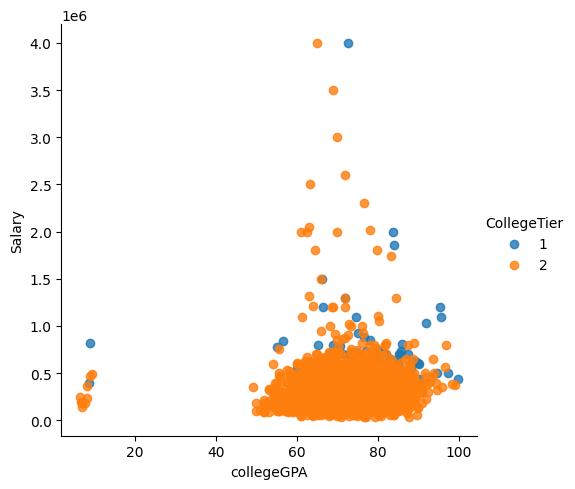

In [ ]:
sns.lmplot(
    x="Tenure", y="Salary", data=df, hue="CollegeTier", fit_reg=False
)
sns.lmplot(
    x="Quant", y="Salary", data=df, hue="CollegeTier", fit_reg=False
)
sns.lmplot(
    x="12percentage", y="Salary", data=df, hue="CollegeTier", fit_reg=False
)
sns.lmplot(
    x="English", y="Salary", data=df, hue="CollegeTier", fit_reg=False
)
sns.lmplot(
    x="collegeGPA", y="Salary", data=df, hue="CollegeTier", fit_reg=False
)
plt.show()